# Randomized Nyström Low Rank Approximation


## Data Generation

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import pickle, bz2
import matplotlib.pyplot as plt

In [3]:
# Polynomial Decay Matrix
def PolyDecDiagonal(R,n,p):
    D_0 = np.ones(R)
    D_1 = np.arange(2, n-R+2)**(-p)
    D = np.concatenate((D_0, D_1))
    return D

with open('A_Poly_test.pkl', 'wb') as f:
    pickle.dump(PolyDecDiagonal(5,2**13,0.5), f)

In [5]:
# Exponential Decay Matrix
def ExpDecDiagonal(R,n,q):
    D_0 = np.ones(R)    
    D_1 = np.exp(-q*np.arange(2, n-R+2))
    D = np.concatenate((D_0, D_1))
    return D

with open('A_Exp_test.pkl', 'wb') as f:
    pickle.dump(ExpDecDiagonal(5,2**13,.1), f)

In [ ]:
# MNIST
def RBF(x, y, c):
    return np.exp(-(1/c**2)*np.linalg.norm(x-y)**2)

n = 2**13
c = 1000

dataset = sp.io.loadmat('mnist.mat')
data = np.array(dataset['Z'])
data = data[:n,:]
A = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        A[i,j] = RBF(data[i], data[j], c)

del dataset
del data

filename = 'A_MNIST_8192.pkl'
with open(filename, 'wb') as f:
    pickle.dump(A, f)

In [ ]:
# YearPredictionMSD
file_path = 'YearPredictionMSD.bz2'
with bz2.BZ2File(file_path, 'rb') as f:
    lines = f.readlines()

targets, features = [], []
for line in lines:
    decoded_line = line.decode('utf-8').strip()
    parts = decoded_line.split()
    
    target = int(parts[0])
    targets.append(target)
    
    feature_values = [float(feat.split(':')[1]) for feat in parts[1:]]
    features.append(feature_values)

X = pd.DataFrame(features) 
y = pd.Series(targets, name="Year")

n = 2**13
c1 = 1e4

data = X.to_numpy()
data = data[:n, :]
del X, y

A1 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A1[i,j] = RBF(data[i], data[j], c1)
del data

filename1 = 'A_MSD_104_8192.pkl'
with open(filename1, 'wb') as f:
    pickle.dump(A1, f)
del A1

## Stability Analysis

### Polynomial Matrix

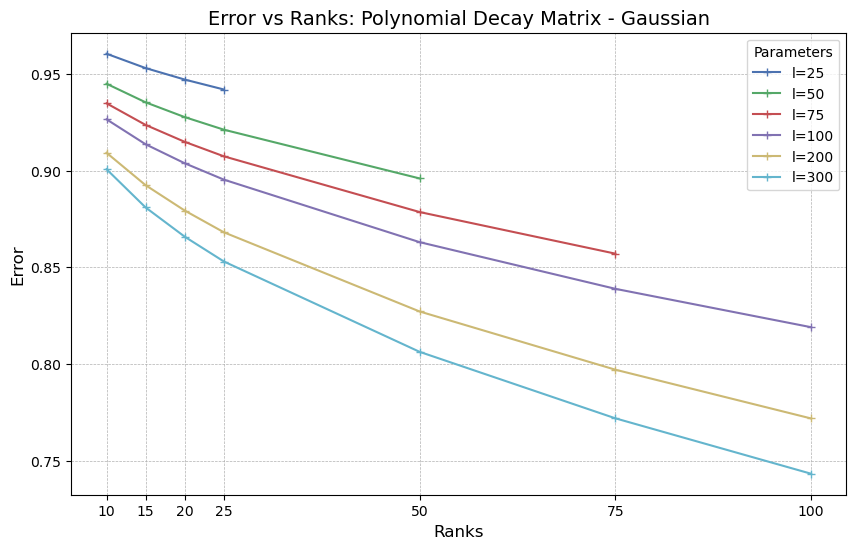

In [7]:
# Gaussian
l_25_g = [0.9603842845958132, 0.9529518833734012, 0.9470166142718979, 0.941883425520964]
l_50_g = [0.9448726595875034, 0.935247039324995, 0.9276039420312391, 0.9211046368203194, 0.8959119928343062]
l_75_g = [0.9347550374621552, 0.9235617456258658, 0.9148190533590698, 0.9073388155412786, 0.8785395590872541, 0.8570320933063433]
l_100_g = [0.9264817629014027, 0.9135656506052551, 0.9037437087655685, 0.8952831267898982, 0.8629757673654164, 0.8388547983559262, 0.8190152567292497]
l_200_g = [0.9091891620316127, 0.8924032229320704, 0.8792884127617885, 0.8680602022241503, 0.8271376956878249, 0.7970483099644556, 0.7718418109480114]
l_300_g = [0.9006870854793249, 0.880892932592073, 0.8657746637317368, 0.8529670953478299, 0.8062677907567614, 0.771911206094456, 0.7432688722935712]

plt.figure(figsize=(10, 6))
plt.plot(k[:len(l_25_g)], l_25_g, label='l=25', linestyle='-', marker='+', color='#4c72b0')
plt.plot(k[:len(l_50_g)], l_50_g, label='l=50', linestyle='-', marker='+', color='#55a868')
plt.plot(k[:len(l_75_g)], l_75_g, label='l=75', linestyle='-', marker='+', color='#c44e52')
plt.plot(k[:len(l_100_g)], l_100_g, label='l=100', linestyle='-', marker='+', color='#8172b2')
plt.plot(k[:len(l_200_g)], l_200_g, label='l=200', linestyle='-', marker='+', color='#ccb974')
plt.plot(k[:len(l_300_g)], l_300_g, label='l=300', linestyle='-', marker='+', color='#64b5cd')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.xticks(k)
plt.title('Error vs Ranks: Polynomial Decay Matrix - Gaussian', fontsize = 14)
plt.xlabel('Ranks', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.show()

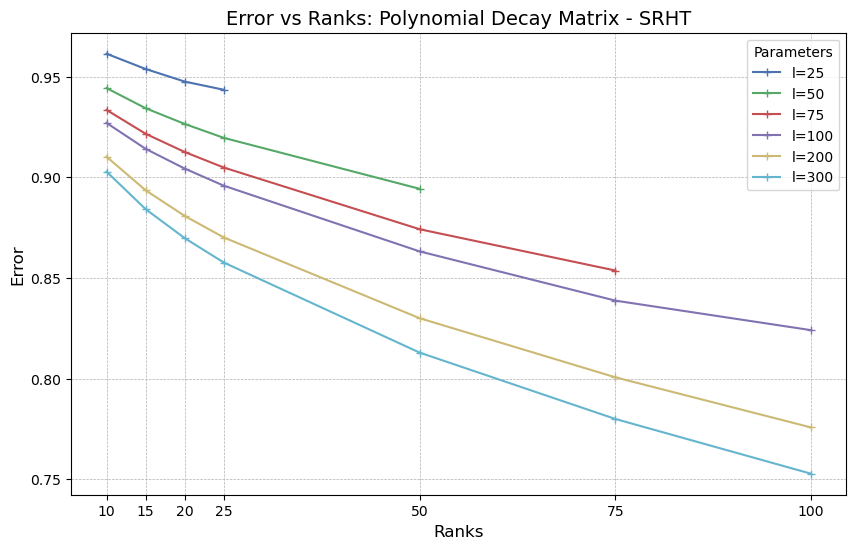

In [6]:
# SHRT
k = [10, 15, 20, 25, 50, 75, 100]
l_25_s = [0.9613384195538625, 0.9537518733435544, 0.9474921847099849, 0.9434333892635338]
l_50_s = [0.9442821391825208, 0.9342689229269386, 0.9264495239469221, 0.9195463809113736, 0.894260208798225]
l_75_s = [0.9334350246403859, 0.9215773727672435, 0.9125180211347271, 0.9047999906067326, 0.8741919393830813, 0.853686205911286]
l_100_s = [0.9269939127518456, 0.9141047037824368, 0.9042901337738267, 0.8957841314606398, 0.8631895619079475, 0.8387423022041287, 0.8240772943382483]
l_200_s = [0.9102046531410465, 0.8935310113420271, 0.8807725537307213, 0.8700828046405705, 0.8300094149935970, 0.8006700486174599, 0.7757786062028387]
l_300_s = [0.9028162442587839, 0.8841491477405153, 0.8697299063688497, 0.8576243626058725, 0.8129350164368826, 0.7799837646196587, 0.7527934926874092]

plt.figure(figsize=(10, 6))
plt.plot(k[:len(l_25_s)], l_25_s, label=r'l=25', linestyle='-', marker='+', color='#4c72b0')
plt.plot(k[:len(l_50_s)], l_50_s, label=r'l=50', linestyle='-', marker='+', color='#55a868')
plt.plot(k[:len(l_75_s)], l_75_s, label=r'l=75', linestyle='-', marker='+', color='#c44e52')
plt.plot(k[:len(l_100_s)], l_100_s, label=r'l=100', linestyle='-', marker='+', color='#8172b2')
plt.plot(k[:len(l_200_s)], l_200_s, label=r'l=200', linestyle='-', marker='+', color='#ccb974')
plt.plot(k[:len(l_300_s)], l_300_s, label=r'l=300', linestyle='-', marker='+', color='#64b5cd')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.xticks(k)
plt.title('Error vs Ranks: Polynomial Decay Matrix - SRHT', fontsize = 14)
plt.xlabel('Ranks', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.show()

### Exponential Matrix

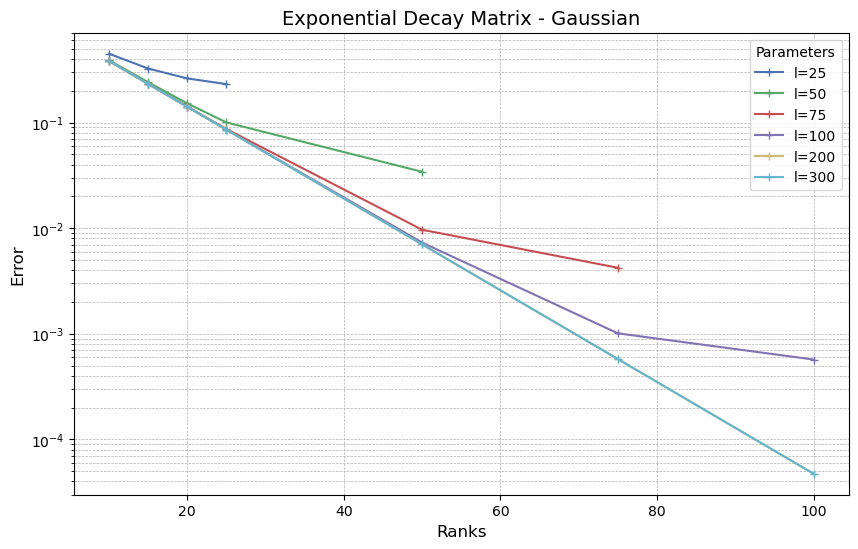

In [9]:
# Gaussian
l_25_g = [0.44941952000067337, 0.3253442501742262, 0.262167830025669, 0.2316046422838543]
l_50_g = [0.38961981746307534, 0.24115982343483203, 0.15206797134299824, 0.10038560232011526, 0.03423065858062491]
l_75_g = [0.38412120200748223, 0.23340638164778688, 0.1421031557185777, 0.08688540187656717, 0.009674941543277428, 0.004224089443575661]
l_100_g = [0.3836437702187504, 0.23274037050548407, 0.14123201251740342, 0.08574800932749882, 0.0073095966818825285, 0.0010107640203192419, 0.0005710360300617744]
l_200_g = [0.38359873137536304, 0.23266439374669007, 0.1411180905207704, 0.08559245130687719, 0.007025867229320202, 0.000576734284505661, 4.736274533424352e-5]
l_300_g = [0.38359872905314785, 0.23266439019763732, 0.14111808607832552, 0.0855924458466061, 0.007025855800072622, 0.0005767173644936982, 4.733984514761259e-5]

plt.figure(figsize=(10, 6))
plt.plot(k[:len(l_25_g)], l_25_g, label='l=25', linestyle='-', marker='+', color='#4c72b0')
plt.plot(k[:len(l_50_g)], l_50_g, label='l=50', linestyle='-', marker='+', color='#55a868')
plt.plot(k[:len(l_75_g)], l_75_g, label='l=75', linestyle='-', marker='+', color='#c44e52')
plt.plot(k[:len(l_100_g)], l_100_g, label='l=100', linestyle='-', marker='+', color='#8172b2')
plt.plot(k[:len(l_200_g)], l_200_g, label='l=200', linestyle='-', marker='+', color='#ccb974')
plt.plot(k[:len(l_300_g)], l_300_g, label='l=300', linestyle='-', marker='+', color='#64b5cd') 
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.title('Exponential Decay Matrix - Gaussian', fontsize = 14)
plt.xlabel('Ranks', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.show()

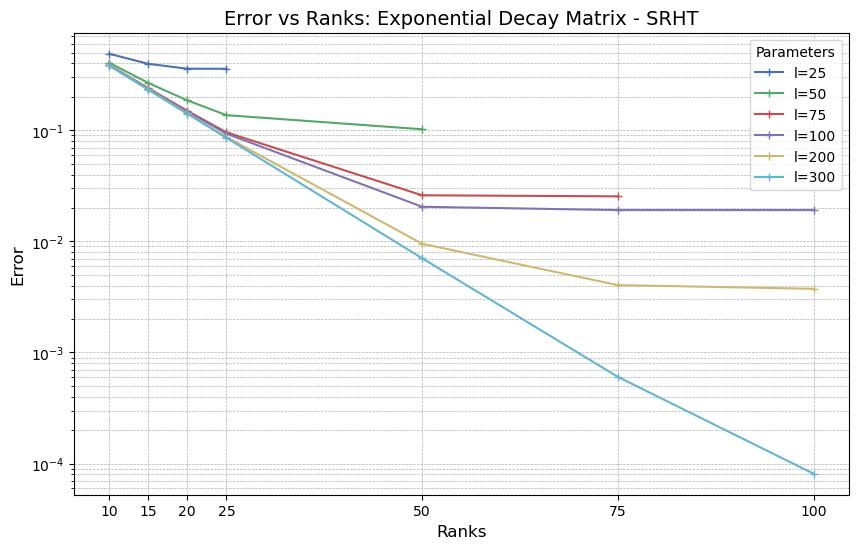

In [8]:
# SHRT
l_25_s = [0.4895647390403622, 0.39733274227062304, 0.3586398604417049, 0.35846660120788526]
l_50_s = [0.4073419570518517, 0.2672026873420071, 0.18611970385404433, 0.13696712092630092, 0.102266367792511]
l_75_s = [0.38833427095814893, 0.2395478238656648, 0.14991620151549975, 0.09586502910418387, 0.026006437067063647, 0.025445402802364375]
l_100_s = [0.3869353388337007, 0.23756773709050089, 0.1476410904898842, 0.09335480122730361, 0.020499344749095906, 0.019130840583279473, 0.019130353572554108]
l_200_s = [0.3841427856155625, 0.2334861359008128, 0.14223333102469396, 0.08695885253585882, 0.009518618963224484, 0.004039321898974735, 0.0037421837568892813]
l_300_s = [0.38360224869745263, 0.2326697135791006, 0.1411251311844232, 0.08560114265867863, 0.0070448224327822, 0.0006026563314044593, 8.09287197989636e-5]

plt.figure(figsize=(10, 6))
plt.plot(k[:len(l_25_s)], l_25_s, label='l=25', linestyle='-', marker='+', color='#4c72b0')
plt.plot(k[:len(l_50_s)], l_50_s, label='l=50', linestyle='-', marker='+', color='#55a868')
plt.plot(k[:len(l_75_s)], l_75_s, label='l=75', linestyle='-', marker='+', color='#c44e52')
plt.plot(k[:len(l_100_s)], l_100_s, label='l=100', linestyle='-', marker='+', color='#8172b2')
plt.plot(k[:len(l_200_s)], l_200_s, label='l=200', linestyle='-', marker='+', color='#ccb974')
plt.plot(k[:len(l_300_s)], l_300_s, label='l=300', linestyle='-', marker='+', color='#64b5cd')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.xticks(k)
plt.title('Error vs Ranks: Exponential Decay Matrix - SRHT', fontsize = 14)
plt.xlabel('Ranks', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.show()

### MNIST

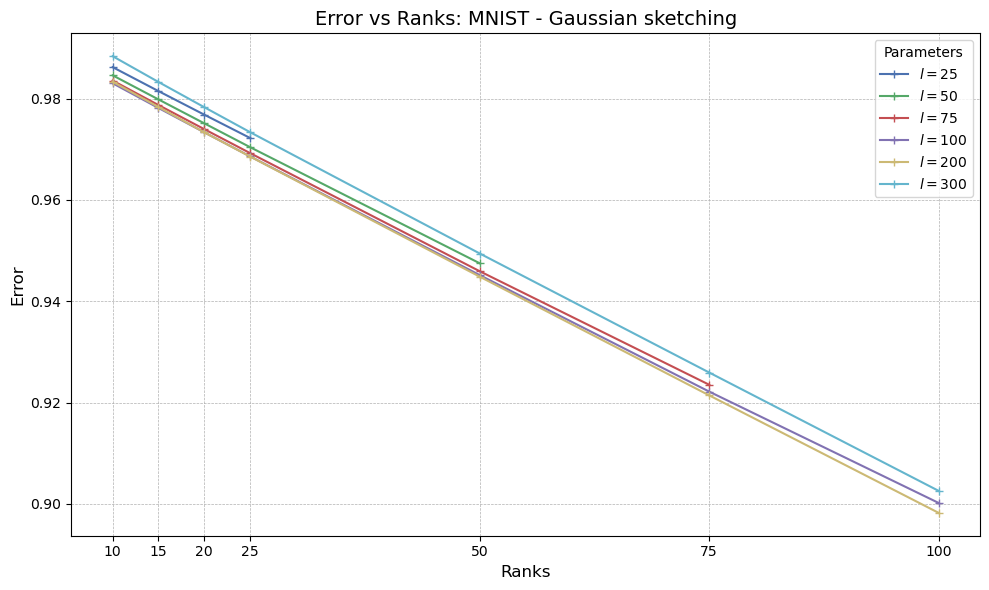

In [11]:
# Gaussian
ranks = np.array([10,15,20,25,50,75,100])
error_25 = np.array([0.9862319898071965, 0.9814949749121081, 0.9768291267740152, 0.972222795491044])
error_50 = np.array([0.9846125642562787, 0.9798490153135393, 0.9751244778943015, 0.9704084940809964, 0.9475049796663031])
error_75 = np.array([0.98358053740759, 0.9787413090784949, 0.9739719197216458, 0.969238478883487, 0.9459334484824347, 0.9235274398512106])
error_100 = np.array([0.9830497225220137, 0.9781639783606256, 0.9733495005220324, 0.9685887197863977, 0.945171027428267, 0.9221733021496571, 0.9001940670782047])
error_200 = np.array([0.9833581988099525, 0.9783502172582339, 0.9733476219546366, 0.9685599771760535, 0.9448613048472848, 0.9214322450581377, 0.8982356146600154])
error_300 = np.array([0.9883915090496429, 0.9832941130167779, 0.9783070835740119, 0.9733660736001812, 0.9494383739800065, 0.9259395994560897, 0.9025778940865227])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.title("Error vs Ranks: MNIST - Gaussian sketching", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

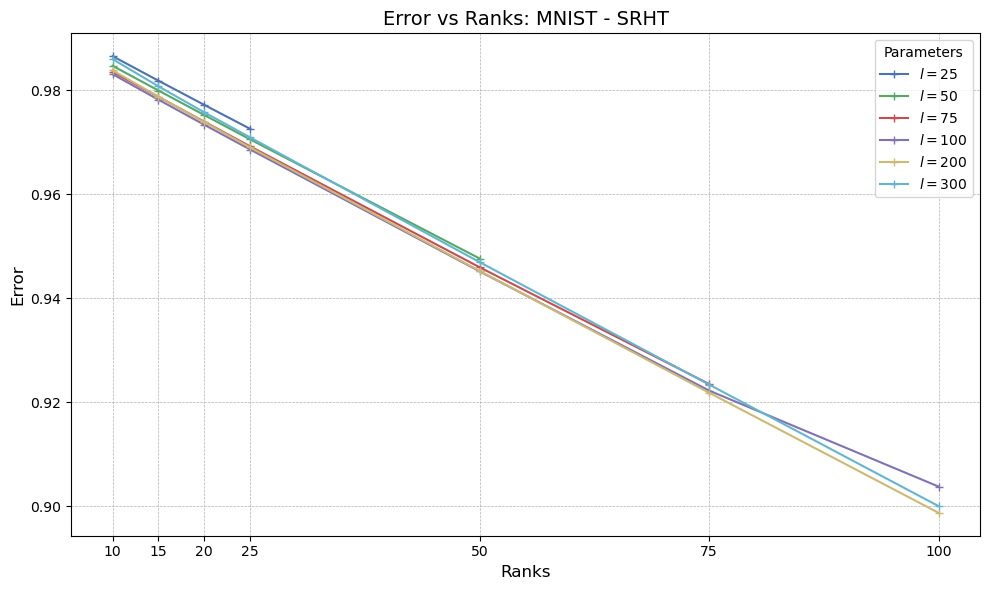

In [13]:
# SRHT
error_25 = np.array([0.9865898956184516, 0.9818676505974313, 0.9772090913722352, 0.9726045053512884])
error_50 = np.array([0.9847361684071415, 0.9799818804920971, 0.9752548004574992, 0.9705677151996149, 0.9476656071482061])
error_75 = np.array([0.9835770407730045, 0.9787629693649648, 0.9739849535208683, 0.9692326218843619, 0.9459802890386562, 0.9235312846961077])
error_100 = np.array([0.983128241892852, 0.9782156327292633, 0.9733897732203084, 0.9686294057179531, 0.9451948158477463, 0.9222701401076732, 0.903809180563046])
error_200 = np.array([0.9838651575061648, 0.9788013888357819, 0.9738951393005709, 0.9690347682261179, 0.9452899579228257, 0.9218583933083162, 0.8987603504530438])
error_300 = np.array([0.9860214201318244, 0.9807854324098824, 0.975775379976173, 0.9709495248492243, 0.946964056229503, 0.9234216160333625, 0.900049393903809])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.title("Error vs Ranks: MNIST - SRHT", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

### MSD - c=$10^4$

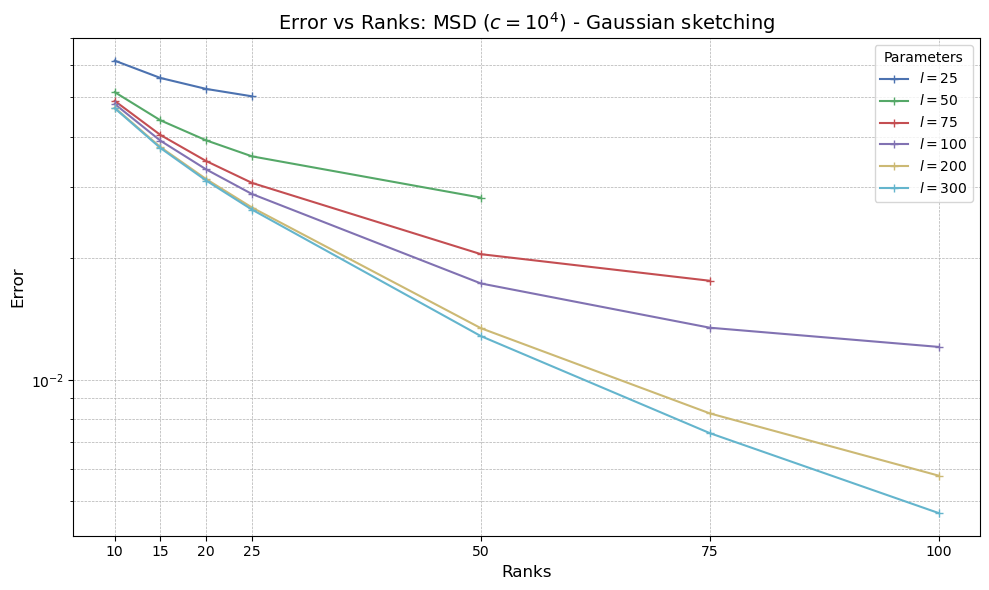

In [19]:
# Gaussian
error_25 = np.array([0.061632286077302, 0.05584002193440731, 0.05245601178051401, 0.05029772649537714])
error_50 = np.array([0.05151414621268101, 0.04386550260338955, 0.03912796372541444, 0.03572170449971167, 0.028228691595416175])
error_75 = np.array([0.04900639048422752, 0.040350951720814265, 0.03477192089391987, 0.03070195265358819, 0.020454249539086977, 0.017577926160350622])
error_100 = np.array([0.04815596191352813, 0.0390516601178739, 0.033154390370356356, 0.028818568886852226, 0.017309469139502452, 0.013450392372698244, 0.012056783309287342])
error_200 = np.array([0.04713936718090565, 0.0376550013634207, 0.03137139912234852, 0.026679601209115566, 0.013412245124373086, 0.008253486107645924, 0.005787049965068595])
error_300 = np.array([0.04700202613956556, 0.03745478374856743, 0.031109231698976926, 0.026365553934362095, 0.01282073006882576, 0.007374287994337379, 0.004675809996419543])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.yscale('log')
plt.title(r"Error vs Ranks: MSD ($c = 10^4$) - Gaussian sketching", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

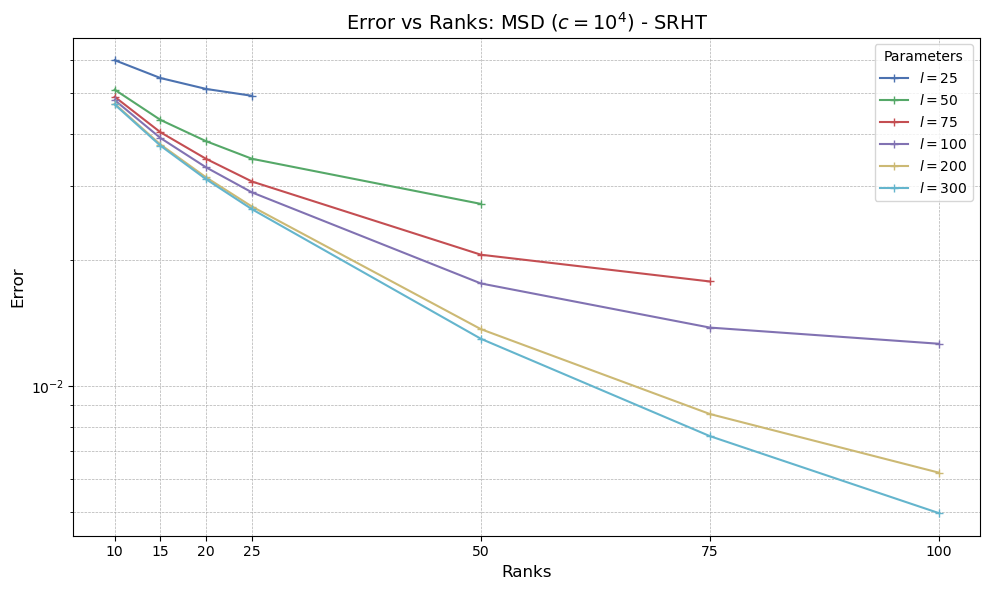

In [20]:
# SRHT
error_25 = np.array([0.060004720561790466, 0.05439821438919006, 0.05122682201439092, 0.049337278510572284])
error_50 = np.array([0.05103057639305754, 0.04321931802973581, 0.038434727227270864, 0.034903018684362845, 0.02724216369837243])
error_75 = np.array([0.04907588778606836, 0.040384795613936694, 0.03488020362895203, 0.03080386763939137, 0.02060499658835592, 0.017789797736533785])
error_100 = np.array([0.048170915217112587, 0.03912969842635429, 0.033282458488554975, 0.0290153029437035, 0.017596476496562513, 0.013808300652871511, 0.012634658310050322])
error_200 = np.array([0.04720541874649184, 0.03775192235530494, 0.03149715193698413, 0.026841973435867368, 0.013687422359638528, 0.008588051463284204, 0.006223335464579658])
error_300 = np.array([0.04704133466330809, 0.037509267921214215, 0.031181632672470334, 0.026453024781064344, 0.01298183883275492, 0.00760562371692948, 0.0049834146745483835])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.yscale('log')
plt.title(r"Error vs Ranks: MSD ($c = 10^4$) - SRHT", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

### MSD - c=$10^5$

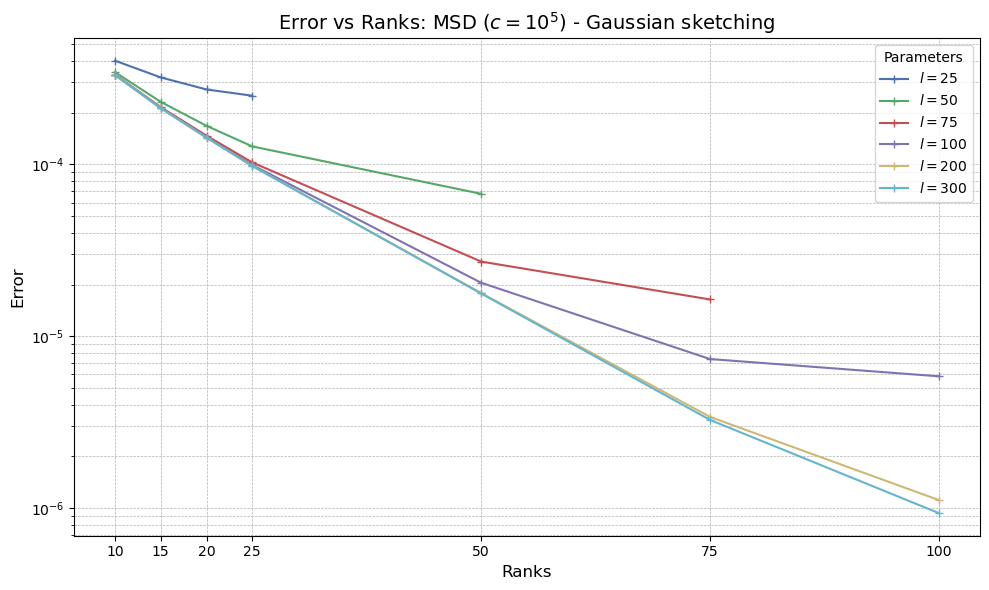

In [21]:
# Gaussian
error_25 = np.array([0.0004020328674535297, 0.0003210960664552264, 0.00027324856508611074, 0.0002512997100069424])
error_50 = np.array([0.00034452816691433617, 0.0002312865809180204, 0.00016789809468283878, 0.00012732765269907835, 6.748283320247319e-05])
error_75 = np.array([0.0003337700127000445, 0.00021550812268536477, 0.00014706749581090957, 0.00010270692554852626, 2.720504268486445e-05, 1.6374629617325533e-05])
error_100 = np.array([0.0003322848286380261, 0.00021333055748897815, 0.00014437677774938504, 9.92271726104975e-05, 2.048028336122719e-05, 7.366335696489448e-06, 5.843575103008503e-06])
error_200 = np.array([0.0003318138539139204, 0.00021253458019428658, 0.000143306189346324, 9.793090708566004e-05, 1.7828764615528366e-05, 3.393132336854849e-06, 1.1122199254283461e-06])
error_300 = np.array([0.00033179566816152173, 0.00021250718675624704, 0.000143268962057654, 9.788362537060674e-05, 1.77367591714147e-05, 3.2579016808360456e-06, 9.340805128804216e-07])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.yscale('log')
plt.title(r"Error vs Ranks: MSD ($c = 10^5$) - Gaussian sketching", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

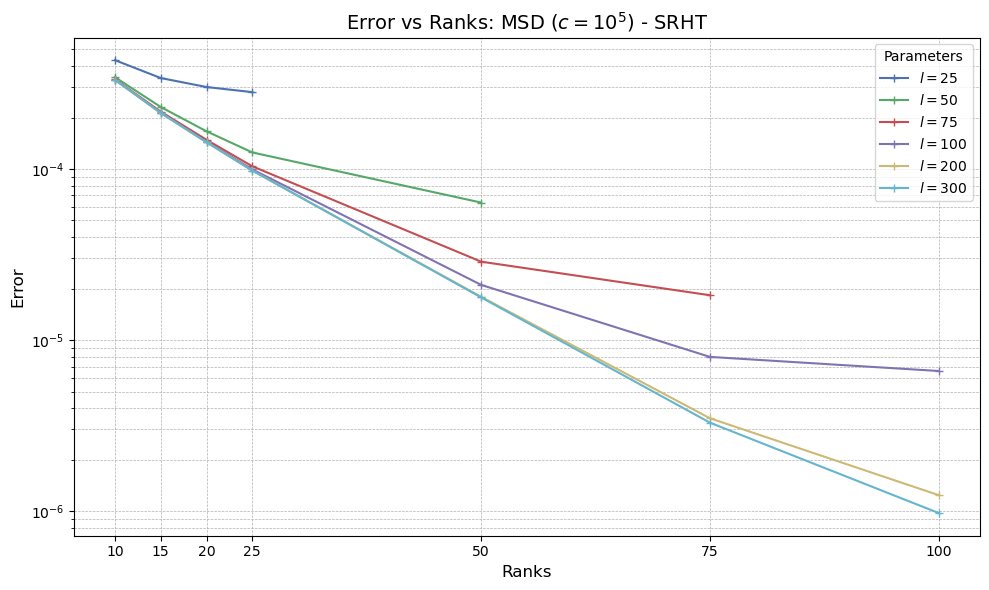

In [22]:
# SRHT
error_25 = np.array([0.00043272723868972195, 0.0003402708019423011, 0.0003014820947848655, 0.000281411349599172])
error_50 = np.array([0.00034403034753937016, 0.00023035833564063853, 0.00016609311781684796, 0.00012496992438867647, 6.36392840534759e-05])
error_75 = np.array([0.0003344967315883282, 0.00021638977406108638, 0.00014811982718754675, 0.0001037177810648515, 2.872266426637707e-05, 1.8278170987583765e-05])
error_100 = np.array([0.0003324578688840666, 0.00021352467848794382, 0.0001445758285517716, 9.951861401827483e-05, 2.101448647685523e-05, 7.968932923995372e-06, 6.590921784885051e-06])
error_200 = np.array([0.00033183127960274416, 0.00021255763204587713, 0.000143332993723481, 9.796386069085653e-05, 1.7891271290746167e-05, 3.488388969331936e-06, 1.2389084001111778e-06])
error_300 = np.array([0.00033179998836983864, 0.00021251319411334058, 0.0001432766185772413, 9.789308596097443e-05, 1.775591406869148e-05, 3.2870097626829145e-06, 9.735308502649847e-07])

plt.figure(figsize=(10, 6))
plt.plot(ranks[:len(error_25)], error_25, marker='+', color='#4c72b0', label=r"$l=25$")
plt.plot(ranks[:len(error_50)], error_50, marker='+', color='#55a868', label=r"$l=50$")
plt.plot(ranks[:len(error_75)], error_75, marker='+', color='#c44e52', label=r"$l=75$")
plt.plot(ranks[:len(error_100)], error_100, marker='+', color='#8172b2', label=r"$l=100$")
plt.plot(ranks[:len(error_200)], error_200, marker='+', color='#ccb974', label=r"$l=200$")
plt.plot(ranks[:len(error_300)], error_300, marker='+', color='#64b5cd', label=r"$l=300$")
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(ranks)
plt.yscale('log')
plt.title(r"Error vs Ranks: MSD ($c = 10^5$) - SRHT", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Parameters", fontsize=10)
plt.tight_layout()
plt.show()

### MNIST Singular Values Plot

In [ ]:
with open('singular_values.pkl', 'rb') as f:
    singular_values = pickle.load(f)

plt.figure(figsize=(10, 6))
plt.plot(np.flip(singular_values), linestyle='-', color='coral', label='Singular Values')
plt.title('Singular Values of MNIST', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.yscale('log')  # Use log scale if the range is large
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Sequential Runtimes

In [27]:
# Polynomial Decay Matrix - Gaussian
Poly_1_50_G = [0.981374323, 0.979226503, 0.978363771]
Poly_1_100_G = [1.127577891, 1.130427943, 1.128370646]
Poly_1_150_G = [1.288635876, 1.284699015, 1.282734085]
Poly_1_200_G = [1.420275596, 1.415334028, 1.41999106]

Poly_4_50_G = [0.837630181, 0.835714245, 0.838080549]
Poly_4_100_G = [0.900955273, 0.902828261, 0.905458216]
Poly_4_150_G = [0.970209381, 0.97361035, 0.973822367]
Poly_4_200_G = [1.031537228, 1.035477804, 1.036653994]

Poly_16_50_G = [0.715785233, 0.713134748, 0.711599858]
Poly_16_100_G = [0.757172767, 0.755077705, 0.7557874]
Poly_16_150_G = [0.801554048, 0.799613487, 0.798560583]
Poly_16_200_G = [0.834574956, 0.835048203, 0.832479013]

Poly_64_50_G = [0.637780682, 0.631349497, 0.628177474]
Poly_64_100_G = [0.652952694, 0.649537332, 0.648087467]
Poly_64_150_G = [0.677462812, 0.675055526, 0.675339674]
Poly_64_200_G = [0.704232092, 0.706933505, 0.706638372]

Poly_1_50_G_mean, Poly_1_50_G_min, Poly_1_50_G_max = np.mean(Poly_1_50_G), min(Poly_1_50_G), max(Poly_1_50_G)
Poly_1_100_G_mean, Poly_1_100_G_min, Poly_1_100_G_max = np.mean(Poly_1_100_G), min(Poly_1_100_G), max(Poly_1_100_G)
Poly_1_150_G_mean, Poly_1_150_G_min, Poly_1_150_G_max = np.mean(Poly_1_150_G), min(Poly_1_150_G), max(Poly_1_150_G)
Poly_1_200_G_mean, Poly_1_200_G_min, Poly_1_200_G_max = np.mean(Poly_1_200_G), min(Poly_1_200_G), max(Poly_1_200_G)

Poly_4_50_G_mean, Poly_4_50_G_min, Poly_4_50_G_max = np.mean(Poly_4_50_G), min(Poly_4_50_G), max(Poly_4_50_G)
Poly_4_100_G_mean, Poly_4_100_G_min, Poly_4_100_G_max = np.mean(Poly_4_100_G), min(Poly_4_100_G), max(Poly_4_100_G)
Poly_4_150_G_mean, Poly_4_150_G_min, Poly_4_150_G_max = np.mean(Poly_4_150_G), min(Poly_4_150_G), max(Poly_4_150_G)
Poly_4_200_G_mean, Poly_4_200_G_min, Poly_4_200_G_max = np.mean(Poly_4_200_G), min(Poly_4_200_G), max(Poly_4_200_G)

Poly_16_50_G_mean, Poly_16_50_G_min, Poly_16_50_G_max = np.mean(Poly_16_50_G), min(Poly_16_50_G), max(Poly_16_50_G)
Poly_16_100_G_mean, Poly_16_100_G_min, Poly_16_100_G_max = np.mean(Poly_16_100_G), min(Poly_16_100_G), max(Poly_16_100_G)
Poly_16_150_G_mean, Poly_16_150_G_min, Poly_16_150_G_max = np.mean(Poly_16_150_G), min(Poly_16_150_G), max(Poly_16_150_G)
Poly_16_200_G_mean, Poly_16_200_G_min, Poly_16_200_G_max = np.mean(Poly_16_200_G), min(Poly_16_200_G), max(Poly_16_200_G)

Poly_64_50_G_mean, Poly_64_50_G_min, Poly_64_50_G_max = np.mean(Poly_64_50_G), min(Poly_64_50_G), max(Poly_64_50_G)
Poly_64_100_G_mean, Poly_64_100_G_min, Poly_64_100_G_max = np.mean(Poly_64_100_G), min(Poly_64_100_G), max(Poly_64_100_G)
Poly_64_150_G_mean, Poly_64_150_G_min, Poly_64_150_G_max = np.mean(Poly_64_150_G), min(Poly_64_150_G), max(Poly_64_150_G)
Poly_64_200_G_mean, Poly_64_200_G_min, Poly_64_200_G_max = np.mean(Poly_64_200_G), min(Poly_64_200_G), max(Poly_64_200_G)

In [28]:
# Polynomial Decay Matrix - SRHT
Poly_1_50_S = [1.413036644, 1.405891217, 1.413647079]
Poly_1_100_S = [1.681330691, 1.677835072, 1.683759861]
Poly_1_150_S = [1.973498526, 1.967263147, 1.963675799]
Poly_1_200_S = [2.255350065, 2.253688823, 2.251544221]

Poly_4_50_S = [0.981392217, 0.9787479, 0.983264907]
Poly_4_100_S = [1.084937619, 1.080802651, 1.080167117]
Poly_4_150_S = [1.19220563, 1.189030913, 1.188157088]
Poly_4_200_S = [1.297614568, 1.298716052, 1.296828198]

Poly_16_50_S = [0.811609425, 0.807940407, 0.804335416]
Poly_16_100_S = [0.854369201, 0.852985831, 0.854707997]
Poly_16_150_S = [0.9168573, 0.944276538, 0.912016909]
Poly_16_200_S = [0.970461229, 0.966578857, 0.972445441]

Poly_64_50_S = [0.701201364, 0.697026448, 0.706197936]
Poly_64_100_S = [0.726344344, 0.722597806, 0.738157674]
Poly_64_150_S = [0.75809307, 0.773865908, 0.7806088400]
Poly_64_200_S = [0.795059311, 0.792927111, 0.794555255]

Poly_1_50_S_mean, Poly_1_50_S_min, Poly_1_50_S_max = np.mean(Poly_1_50_S), min(Poly_1_50_S), max(Poly_1_50_S)
Poly_1_100_S_mean, Poly_1_100_S_min, Poly_1_100_S_max = np.mean(Poly_1_100_S), min(Poly_1_100_S), max(Poly_1_100_S)
Poly_1_150_S_mean, Poly_1_150_S_min, Poly_1_150_S_max = np.mean(Poly_1_150_S), min(Poly_1_150_S), max(Poly_1_150_S)
Poly_1_200_S_mean, Poly_1_200_S_min, Poly_1_200_S_max = np.mean(Poly_1_200_S), min(Poly_1_200_S), max(Poly_1_200_S)

Poly_4_50_S_mean, Poly_4_50_S_min, Poly_4_50_S_max = np.mean(Poly_4_50_S), min(Poly_4_50_S), max(Poly_4_50_S)
Poly_4_100_S_mean, Poly_4_100_S_min, Poly_4_100_S_max = np.mean(Poly_4_100_S), min(Poly_4_100_S), max(Poly_4_100_S)
Poly_4_150_S_mean, Poly_4_150_S_min, Poly_4_150_S_max = np.mean(Poly_4_150_S), min(Poly_4_150_S), max(Poly_4_150_S)
Poly_4_200_S_mean, Poly_4_200_S_min, Poly_4_200_S_max = np.mean(Poly_4_200_S), min(Poly_4_200_S), max(Poly_4_200_S)

Poly_16_50_S_mean, Poly_16_50_S_min, Poly_16_50_S_max = np.mean(Poly_16_50_S), min(Poly_16_50_S), max(Poly_16_50_S)
Poly_16_100_S_mean, Poly_16_100_S_min, Poly_16_100_S_max = np.mean(Poly_16_100_S), min(Poly_16_100_S), max(Poly_16_100_S)
Poly_16_150_S_mean, Poly_16_150_S_min, Poly_16_150_S_max = np.mean(Poly_16_150_S), min(Poly_16_150_S), max(Poly_16_150_S)
Poly_16_200_S_mean, Poly_16_200_S_min, Poly_16_200_S_max = np.mean(Poly_16_200_S), min(Poly_16_200_S), max(Poly_16_200_S)

Poly_64_50_S_mean, Poly_64_50_S_min, Poly_64_50_S_max = np.mean(Poly_64_50_S), min(Poly_64_50_S), max(Poly_64_50_S)
Poly_64_100_S_mean, Poly_64_100_S_min, Poly_64_100_S_max = np.mean(Poly_64_100_S), min(Poly_64_100_S), max(Poly_64_100_S)
Poly_64_150_S_mean, Poly_64_150_S_min, Poly_64_150_S_max = np.mean(Poly_64_150_S), min(Poly_64_150_S), max(Poly_64_150_S)
Poly_64_200_S_mean, Poly_64_200_S_min, Poly_64_200_S_max = np.mean(Poly_64_200_S), min(Poly_64_200_S), max(Poly_64_200_S)

In [25]:
# Exponential Decay Matrix - Gaussian
Exp_1_50_G = [1.072058269, 1.076145348, 1.07185987]
Exp_1_100_G = [1.227946962, 1.253002963, 1.257454699]
Exp_1_150_G = [1.404243586, 1.400872104, 1.405457072]
Exp_1_200_G = [1.590750635, 1.595505257, 1.589906672]

Exp_4_50_G = [0.870464526, 0.88231341, 0.876721086]
Exp_4_100_G = [0.975051416, 0.976869145, 0.930852215]
Exp_4_150_G = [1.003714615, 1.002489488, 1.00636553]
Exp_4_200_G = [1.146757822, 1.078796494, 1.080544078]

Exp_16_50_G = [0.699380675, 0.706478008, 0.694972822]
Exp_16_100_G = [0.732631884, 0.727748684, 0.728774789]
Exp_16_150_G = [0.769853529, 0.764392857, 0.766775833]
Exp_16_200_G = [0.807519033, 0.805435752, 0.799717247]

Exp_64_50_G = [0.63749724, 0.637631702, 0.642357052]
Exp_64_100_G = [0.652066978, 0.650602477, 0.653934273]
Exp_64_150_G = [0.675436416, 0.676667636, 0.675899162]
Exp_64_200_G = [0.704929539, 0.705230759, 0.701106948]

Exp_1_50_G_mean, Exp_1_50_G_min, Exp_1_50_G_max = np.mean(Exp_1_50_G), min(Exp_1_50_G), max(Exp_1_50_G)
Exp_1_100_G_mean, Exp_1_100_G_min, Exp_1_100_G_max = np.mean(Exp_1_100_G), min(Exp_1_100_G), max(Exp_1_100_G)
Exp_1_150_G_mean, Exp_1_150_G_min, Exp_1_150_G_max = np.mean(Exp_1_150_G), min(Exp_1_150_G), max(Exp_1_150_G)
Exp_1_200_G_mean, Exp_1_200_G_min, Exp_1_200_G_max = np.mean(Exp_1_200_G), min(Exp_1_200_G), max(Exp_1_200_G)

Exp_4_50_G_mean, Exp_4_50_G_min, Exp_4_50_G_max = np.mean(Exp_4_50_G), min(Exp_4_50_G), max(Exp_4_50_G)
Exp_4_100_G_mean, Exp_4_100_G_min, Exp_4_100_G_max = np.mean(Exp_4_100_G), min(Exp_4_100_G), max(Exp_4_100_G)
Exp_4_150_G_mean, Exp_4_150_G_min, Exp_4_150_G_max = np.mean(Exp_4_150_G), min(Exp_4_150_G), max(Exp_4_150_G)
Exp_4_200_G_mean, Exp_4_200_G_min, Exp_4_200_G_max = np.mean(Exp_4_200_G), min(Exp_4_200_G), max(Exp_4_200_G)

Exp_16_50_G_mean, Exp_16_50_G_min, Exp_16_50_G_max = np.mean(Exp_16_50_G), min(Exp_16_50_G), max(Exp_16_50_G)
Exp_16_100_G_mean, Exp_16_100_G_min, Exp_16_100_G_max = np.mean(Exp_16_100_G), min(Exp_16_100_G), max(Exp_16_100_G)
Exp_16_150_G_mean, Exp_16_150_G_min, Exp_16_150_G_max = np.mean(Exp_16_150_G), min(Exp_16_150_G), max(Exp_16_150_G)
Exp_16_200_G_mean, Exp_16_200_G_min, Exp_16_200_G_max = np.mean(Exp_16_200_G), min(Exp_16_200_G), max(Exp_16_200_G)

Exp_64_50_G_mean, Exp_64_50_G_min, Exp_64_50_G_max = np.mean(Exp_64_50_G), min(Exp_64_50_G), max(Exp_64_50_G)
Exp_64_100_G_mean, Exp_64_100_G_min, Exp_64_100_G_max = np.mean(Exp_64_100_G), min(Exp_64_100_G), max(Exp_64_100_G)
Exp_64_150_G_mean, Exp_64_150_G_min, Exp_64_150_G_max = np.mean(Exp_64_150_G), min(Exp_64_150_G), max(Exp_64_150_G)
Exp_64_200_G_mean, Exp_64_200_G_min, Exp_64_200_G_max = np.mean(Exp_64_200_G), min(Exp_64_200_G), max(Exp_64_200_G)

In [26]:
# Exponential Decay Matrix - SRHT
Exp_1_50_S = [1.597550646, 1.60135877, 1.600946921]
Exp_1_100_S = [1.986971914, 1.997795079, 1.955602962]
Exp_1_150_S = [2.339634846, 2.336715578, 2.353168945]
Exp_1_200_S = [2.75226543, 2.789625035, 2.792901732]

Exp_4_50_S = [1.041431539, 1.047614669, 1.04234742]
Exp_4_100_S = [1.145638927, 1.148060051, 1.150210437]
Exp_4_150_S = [1.267175525, 1.327743985, 1.338204821]
Exp_4_200_S = [1.410244159, 1.395694203, 1.403471916]

Exp_16_50_S = [0.786652784, 0.78367186, 0.782032694]
Exp_16_100_S = [0.830451598, 0.840502999, 0.856227199]
Exp_16_150_S = [0.902849882, 0.880626613, 0.884841569]
Exp_16_200_S = [0.967260517, 0.947724688, 0.964938908]

Exp_64_50_S = [0.700046556, 0.716320585, 0.711474952]
Exp_64_100_S = [0.722927672, 0.725010888, 0.718135868]
Exp_64_150_S = [0.746852276, 0.742900157, 0.753672424]
Exp_64_200_S = [0.785141192, 0.779165986, 0.780797231]

Exp_1_50_S_mean, Exp_1_50_S_min, Exp_1_50_S_max = np.mean(Exp_1_50_S), min(Exp_1_50_S), max(Exp_1_50_S)
Exp_1_100_S_mean, Exp_1_100_S_min, Exp_1_100_S_max = np.mean(Exp_1_100_S), min(Exp_1_100_S), max(Exp_1_100_S)
Exp_1_150_S_mean, Exp_1_150_S_min, Exp_1_150_S_max = np.mean(Exp_1_150_S), min(Exp_1_150_S), max(Exp_1_150_S)
Exp_1_200_S_mean, Exp_1_200_S_min, Exp_1_200_S_max = np.mean(Exp_1_200_S), min(Exp_1_200_S), max(Exp_1_200_S)

Exp_4_50_S_mean, Exp_4_50_S_min, Exp_4_50_S_max = np.mean(Exp_4_50_S), min(Exp_4_50_S), max(Exp_4_50_S)
Exp_4_100_S_mean, Exp_4_100_S_min, Exp_4_100_S_max = np.mean(Exp_4_100_S), min(Exp_4_100_S), max(Exp_4_100_S)
Exp_4_150_S_mean, Exp_4_150_S_min, Exp_4_150_S_max = np.mean(Exp_4_150_S), min(Exp_4_150_S), max(Exp_4_150_S)
Exp_4_200_S_mean, Exp_4_200_S_min, Exp_4_200_S_max = np.mean(Exp_4_200_S), min(Exp_4_200_S), max(Exp_4_200_S)

Exp_16_50_S_mean, Exp_16_50_S_min, Exp_16_50_S_max = np.mean(Exp_16_50_S), min(Exp_16_50_S), max(Exp_16_50_S)
Exp_16_100_S_mean, Exp_16_100_S_min, Exp_16_100_S_max = np.mean(Exp_16_100_S), min(Exp_16_100_S), max(Exp_16_100_S)
Exp_16_150_S_mean, Exp_16_150_S_min, Exp_16_150_S_max = np.mean(Exp_16_150_S), min(Exp_16_150_S), max(Exp_16_150_S)
Exp_16_200_S_mean, Exp_16_200_S_min, Exp_16_200_S_max = np.mean(Exp_16_200_S), min(Exp_16_200_S), max(Exp_16_200_S)

Exp_64_50_S_mean, Exp_64_50_S_min, Exp_64_50_S_max = np.mean(Exp_64_50_S), min(Exp_64_50_S), max(Exp_64_50_S)
Exp_64_100_S_mean, Exp_64_100_S_min, Exp_64_100_S_max = np.mean(Exp_64_100_S), min(Exp_64_100_S), max(Exp_64_100_S)
Exp_64_150_S_mean, Exp_64_150_S_min, Exp_64_150_S_max = np.mean(Exp_64_150_S), min(Exp_64_150_S), max(Exp_64_150_S)
Exp_64_200_S_mean, Exp_64_200_S_min, Exp_64_200_S_max = np.mean(Exp_64_200_S), min(Exp_64_200_S), max(Exp_64_200_S)

In [29]:
# MNIST
processors = np.array([1, 4, 16, 64])

MNIST_gaussian_1_50 = np.array([1.13216555, 1.124534894, 1.124332779])
MNIST_gaussian_4_50 = np.array([0.910154173, 0.911893938, 0.90402648])
MNIST_gaussian_16_50 = np.array([0.712804223, 0.707944215, 0.710918191])
MNIST_gaussian_64_50 = np.array([0.631513593, 0.638541993, 0.636125142])

MNIST_gaussian_1_100 = np.array([1.337747043, 1.328301349, 1.329556992])
MNIST_gaussian_4_100 = np.array([0.998649279, 0.998992159, 0.999152965])
MNIST_gaussian_16_100 = np.array([0.748288888, 0.747145798, 0.745033307])
MNIST_gaussian_64_100 = np.array([0.65866044, 0.655317209, 0.662087986])

MNIST_gaussian_1_150 = np.array([1.555748092, 1.542421575, 1.549184861])
MNIST_gaussian_4_150 = np.array([1.078170905, 1.082681151, 1.078826988])
MNIST_gaussian_16_150 = np.array([0.795562535, 0.791608644, 0.793929141])
MNIST_gaussian_64_150 = np.array([0.688417406, 0.686103975, 0.683442142])

MNIST_gaussian_1_200 = np.array([1.731394629, 1.74566436, 1.72814135])
MNIST_gaussian_4_200 = np.array([1.154866652, 1.155598561, 1.150389342])
MNIST_gaussian_16_200 = np.array([0.836876774, 0.832819436, 0.835437646])
MNIST_gaussian_64_200 = np.array([0.718486865, 0.712069825, 0.714511905])

MNIST_gaussian_50 = np.array([np.mean(MNIST_gaussian_1_50), np.mean(MNIST_gaussian_4_50), np.mean(MNIST_gaussian_16_50), np.mean(MNIST_gaussian_64_50)])
MNIST_gaussian_100 = np.array([np.mean(MNIST_gaussian_1_100), np.mean(MNIST_gaussian_4_100), np.mean(MNIST_gaussian_16_100), np.mean(MNIST_gaussian_64_100)])
MNIST_gaussian_150 = np.array([np.mean(MNIST_gaussian_1_150), np.mean(MNIST_gaussian_4_150), np.mean(MNIST_gaussian_16_150), np.mean(MNIST_gaussian_64_150)])
MNIST_gaussian_200 = np.array([np.mean(MNIST_gaussian_1_200), np.mean(MNIST_gaussian_4_200), np.mean(MNIST_gaussian_16_200), np.mean(MNIST_gaussian_64_200)])

MNIST_SRHT_1_50 = np.array([1.660751491, 1.664745765, 1.666548629])
MNIST_SRHT_4_50 = np.array([1.076993049, 1.079090644, 1.073114141])
MNIST_SRHT_16_50 = np.array([0.797855879, 0.799365988, 0.791735628])
MNIST_SRHT_64_50 = np.array([0.717087013, 0.708933062, 0.706968431])

MNIST_SRHT_1_100 = np.array([2.071366968, 2.069707611, 2.070866843])
MNIST_SRHT_4_100 = np.array([1.214083043, 1.209597514, 1.206105641])
MNIST_SRHT_16_100 = np.array([0.857326289, 0.850078592, 0.848236379])
MNIST_SRHT_64_100 = np.array([0.72825977, 0.727498035, 0.724427005])

MNIST_SRHT_1_150 = np.array([2.491007079, 2.490700721, 2.493683444])
MNIST_SRHT_4_150 = np.array([1.348864738, 1.341736035, 1.338639856])
MNIST_SRHT_16_150 = np.array([0.904826025, 0.903277296, 0.90087216])
MNIST_SRHT_64_150 = np.array([0.757485235, 0.757404581, 0.753112019])

MNIST_SRHT_1_200 = np.array([2.907998663, 2.903003396, 2.905964837])
MNIST_SRHT_4_200 = np.array([1.470623799, 1.478391374, 1.479122948])
MNIST_SRHT_16_200 = np.array([0.964483464, 0.963556647, 0.967711848])
MNIST_SRHT_64_200 = np.array([0.795381357, 0.793260472, 0.794411017])

MNIST_SRHT_50 = np.array([np.mean(MNIST_SRHT_1_50), np.mean(MNIST_SRHT_4_50), np.mean(MNIST_SRHT_16_50), np.mean(MNIST_SRHT_64_50)])
MNIST_SRHT_100 = np.array([np.mean(MNIST_SRHT_1_100), np.mean(MNIST_SRHT_4_100), np.mean(MNIST_SRHT_16_100), np.mean(MNIST_SRHT_64_100)])
MNIST_SRHT_150 = np.array([np.mean(MNIST_SRHT_1_150), np.mean(MNIST_SRHT_4_150), np.mean(MNIST_SRHT_16_150), np.mean(MNIST_SRHT_64_150)])
MNIST_SRHT_200 = np.array([np.mean(MNIST_SRHT_1_200), np.mean(MNIST_SRHT_4_200), np.mean(MNIST_SRHT_16_200), np.mean(MNIST_SRHT_64_200)])

MNIST_1_50_G_mean, MNIST_1_50_G_min, MNIST_1_50_G_max = np.mean(MNIST_gaussian_1_50), min(MNIST_gaussian_1_50), max(MNIST_gaussian_1_50)
MNIST_1_50_S_mean, MNIST_1_50_S_min, MNIST_1_50_S_max = np.mean(MNIST_SRHT_1_50), min(MNIST_SRHT_1_50), max(MNIST_SRHT_1_50)
MNIST_1_100_G_mean, MNIST_1_100_G_min, MNIST_1_100_G_max = np.mean(MNIST_gaussian_1_100), min(MNIST_gaussian_1_100), max(MNIST_gaussian_1_100)
MNIST_1_100_S_mean, MNIST_1_100_S_min, MNIST_1_100_S_max = np.mean(MNIST_SRHT_1_100), min(MNIST_SRHT_1_100), max(MNIST_SRHT_1_100)
MNIST_1_150_G_mean, MNIST_1_150_G_min, MNIST_1_150_G_max = np.mean(MNIST_gaussian_1_150), min(MNIST_gaussian_1_150), max(MNIST_gaussian_1_150)
MNIST_1_150_S_mean, MNIST_1_150_S_min, MNIST_1_150_S_max = np.mean(MNIST_SRHT_1_150), min(MNIST_SRHT_1_150), max(MNIST_SRHT_1_150)
MNIST_1_200_G_mean, MNIST_1_200_G_min, MNIST_1_200_G_max = np.mean(MNIST_gaussian_1_200), min(MNIST_gaussian_1_200), max(MNIST_gaussian_1_200)
MNIST_1_200_S_mean, MNIST_1_200_S_min, MNIST_1_200_S_max = np.mean(MNIST_SRHT_1_200), min(MNIST_SRHT_1_200), max(MNIST_SRHT_1_200)

In [30]:
# MSD_104
MSD_104_gaussian_1_50 = np.array([1.122026427, 1.124404178, 1.120202583])
MSD_104_gaussian_4_50 = np.array([0.911168223, 0.912114161, 0.908259149])
MSD_104_gaussian_16_50 = np.array([0.718500801, 0.711737951, 0.708374904])
MSD_104_gaussian_64_50 = np.array([0.628808484, 0.636647963, 0.636788817])

MSD_104_gaussian_1_100 = np.array([1.335534055, 1.329109362, 1.337245651])
MSD_104_gaussian_4_100 = np.array([0.991179319, 0.995521184, 0.996067746])
MSD_104_gaussian_16_100 = np.array([0.768035237, 0.744558784, 0.761895766])
MSD_104_gaussian_64_100 = np.array([0.671612167, 0.666192264, 0.677416357])

MSD_104_gaussian_1_150 = np.array([1.548667227, 1.539279779, 1.540834375])
MSD_104_gaussian_4_150 = np.array([1.081322674, 1.083940937, 1.075335449])
MSD_104_gaussian_16_150 = np.array([0.808611688, 0.808119384, 0.822686098])
MSD_104_gaussian_64_150 = np.array([0.695323118, 0.691651516, 0.695845295])

MSD_104_gaussian_1_200 = np.array([1.734894523, 1.73470551, 1.737286255])
MSD_104_gaussian_4_200 = np.array([1.150598627, 1.149093397, 1.156249671])
MSD_104_gaussian_16_200 = np.array([0.872231817, 0.85180263, 0.848542828])
MSD_104_gaussian_64_200 = np.array([0.725119041, 0.721403749, 0.715172906])

MSD_104_gaussian_50 = np.array([np.mean(MSD_104_gaussian_1_50), np.mean(MSD_104_gaussian_4_50), np.mean(MSD_104_gaussian_16_50), np.mean(MSD_104_gaussian_64_50)])
MSD_104_gaussian_100 = np.array([np.mean(MSD_104_gaussian_1_100), np.mean(MSD_104_gaussian_4_100), np.mean(MSD_104_gaussian_16_100), np.mean(MSD_104_gaussian_64_100)])
MSD_104_gaussian_150 = np.array([np.mean(MSD_104_gaussian_1_150), np.mean(MSD_104_gaussian_4_150), np.mean(MSD_104_gaussian_16_150), np.mean(MSD_104_gaussian_64_150)])
MSD_104_gaussian_200 = np.array([np.mean(MSD_104_gaussian_1_200), np.mean(MSD_104_gaussian_4_200), np.mean(MSD_104_gaussian_16_200), np.mean(MSD_104_gaussian_64_200)])

MSD_104_SRHT_1_50 = np.array([1.669484234, 1.664954021, 1.662950993])
MSD_104_SRHT_4_50 = np.array([1.077914996, 1.083004993, 1.081629223])
MSD_104_SRHT_16_50 = np.array([0.806058726, 0.812420584, 0.819029961])
MSD_104_SRHT_64_50 = np.array([0.715469393, 0.709218706, 0.709551531])

MSD_104_SRHT_1_100 = np.array([2.075808511, 2.070255198, 2.069909513])
MSD_104_SRHT_4_100 = np.array([1.205843121, 1.202579246, 1.207738163])
MSD_104_SRHT_16_100 = np.array([0.857719832, 0.864752936, 0.855557858])
MSD_104_SRHT_64_100 = np.array([0.73779972, 0.738216238, 0.728873513])

MSD_104_SRHT_1_150 = np.array([2.486309474, 2.490965098, 2.495193497])
MSD_104_SRHT_4_150 = np.array([1.337323235, 1.344371319, 1.354018494])
MSD_104_SRHT_16_150 = np.array([0.912319359, 0.913618596, 0.910551454])
MSD_104_SRHT_64_150 = np.array([0.76638025, 0.761450677, 0.754979496])

MSD_104_SRHT_1_200 = np.array([2.909173079, 2.904664541, 2.904426245])
MSD_104_SRHT_4_200 = np.array([1.477648873, 1.476232203, 1.476832657])
MSD_104_SRHT_16_200 = np.array([0.97810246, 0.97886646, 0.969997011])
MSD_104_SRHT_64_200 = np.array([0.802854827, 0.789459385, 0.793221302])

MSD_104_SRHT_50 = np.array([np.mean(MSD_104_SRHT_1_50), np.mean(MSD_104_SRHT_4_50), np.mean(MSD_104_SRHT_16_50), np.mean(MSD_104_SRHT_64_50)])
MSD_104_SRHT_100 = np.array([np.mean(MSD_104_SRHT_1_100), np.mean(MSD_104_SRHT_4_100), np.mean(MSD_104_SRHT_16_100), np.mean(MSD_104_SRHT_64_100)])
MSD_104_SRHT_150 = np.array([np.mean(MSD_104_SRHT_1_150), np.mean(MSD_104_SRHT_4_150), np.mean(MSD_104_SRHT_16_150), np.mean(MSD_104_SRHT_64_150)])
MSD_104_SRHT_200 = np.array([np.mean(MSD_104_SRHT_1_200), np.mean(MSD_104_SRHT_4_200), np.mean(MSD_104_SRHT_16_200), np.mean(MSD_104_SRHT_64_200)])

MSD4_1_50_G_mean, MSD4_1_50_G_min, MSD4_1_50_G_max = np.mean(MSD_104_gaussian_1_50), min(MSD_104_gaussian_1_50), max(MSD_104_gaussian_1_50)
MSD4_1_50_S_mean, MSD4_1_50_S_min, MSD4_1_50_S_max = np.mean(MSD_104_SRHT_1_50), min(MSD_104_SRHT_1_50), max(MSD_104_SRHT_1_50)
MSD4_1_100_G_mean, MSD4_1_100_G_min, MSD4_1_100_G_max = np.mean(MSD_104_gaussian_1_100), min(MSD_104_gaussian_1_100), max(MSD_104_gaussian_1_100)
MSD4_1_100_S_mean, MSD4_1_100_S_min, MSD4_1_100_S_max = np.mean(MSD_104_SRHT_1_100), min(MSD_104_SRHT_1_100), max(MSD_104_SRHT_1_100)
MSD4_1_150_G_mean, MSD4_1_150_G_min, MSD4_1_150_G_max = np.mean(MSD_104_gaussian_1_150), min(MSD_104_gaussian_1_150), max(MSD_104_gaussian_1_150)
MSD4_1_150_S_mean, MSD4_1_150_S_min, MSD4_1_150_S_max = np.mean(MSD_104_SRHT_1_150), min(MSD_104_SRHT_1_150), max(MSD_104_SRHT_1_150)
MSD4_1_200_G_mean, MSD4_1_200_G_min, MSD4_1_200_G_max = np.mean(MSD_104_gaussian_1_200), min(MSD_104_gaussian_1_200), max(MSD_104_gaussian_1_200)
MSD4_1_200_S_mean, MSD4_1_200_S_min, MSD4_1_200_S_max = np.mean(MSD_104_SRHT_1_200), min(MSD_104_SRHT_1_200), max(MSD_104_SRHT_1_200)

In [31]:
# MSD_105
MSD_105_gaussian_1_50 = np.array([1.124120482, 1.13428515, 1.13450508])
MSD_105_gaussian_4_50 = np.array([0.90434766, 0.901973284, 0.903891688])
MSD_105_gaussian_16_50 = np.array([0.720599366, 0.718026807, 0.721786374])
MSD_105_gaussian_64_50 = np.array([0.655650072, 0.642360146, 0.6468749])

MSD_105_gaussian_1_100 = np.array([1.331227337, 1.32987377, 1.34064854])
MSD_105_gaussian_4_100 = np.array([0.994844561, 0.999571451, 1.0010241])
MSD_105_gaussian_16_100 = np.array([0.761020572, 0.772358293, 0.761108566])
MSD_105_gaussian_64_100 = np.array([0.66147491, 0.670937688, 0.669087945])

MSD_105_gaussian_1_150 = np.array([1.540944329, 1.540730769, 1.555205705])
MSD_105_gaussian_4_150 = np.array([1.081050088, 1.082024101, 1.0738358])
MSD_105_gaussian_16_150 = np.array([0.813223872, 0.803914249, 0.805796959])
MSD_105_gaussian_64_150 = np.array([0.699131813, 0.691075547, 0.688003621])

MSD_105_gaussian_1_200 = np.array([1.727261462, 1.731338052, 1.739122909])
MSD_105_gaussian_4_200 = np.array([1.149401358, 1.154759914, 1.156118241])
MSD_105_gaussian_16_200 = np.array([0.858516645, 0.870301399, 0.853058253])
MSD_105_gaussian_64_200 = np.array([0.728965604, 0.712534013, 0.712579337])

MSD_105_gaussian_50 = np.array([np.mean(MSD_105_gaussian_1_50), np.mean(MSD_105_gaussian_4_50), np.mean(MSD_105_gaussian_16_50), np.mean(MSD_105_gaussian_64_50)])
MSD_105_gaussian_100 = np.array([np.mean(MSD_105_gaussian_1_100), np.mean(MSD_105_gaussian_4_100), np.mean(MSD_105_gaussian_16_100), np.mean(MSD_105_gaussian_64_100)])
MSD_105_gaussian_150 = np.array([np.mean(MSD_105_gaussian_1_150), np.mean(MSD_105_gaussian_4_150), np.mean(MSD_105_gaussian_16_150), np.mean(MSD_105_gaussian_64_150)])
MSD_105_gaussian_200 = np.array([np.mean(MSD_105_gaussian_1_200), np.mean(MSD_105_gaussian_4_200), np.mean(MSD_105_gaussian_16_200), np.mean(MSD_105_gaussian_64_200)])

MSD_105_SRHT_1_50 = np.array([1.663136345, 1.663269999, 1.66186336])
MSD_105_SRHT_4_50 = np.array([1.078527166, 1.074291903, 1.071215733])
MSD_105_SRHT_16_50 = np.array([0.810456074, 0.805352536, 0.803550847])
MSD_105_SRHT_64_50 = np.array([0.703239824, 0.72831115, 0.715700771])

MSD_105_SRHT_1_100 = np.array([2.067379236, 2.068475477, 2.068773595])
MSD_105_SRHT_4_100 = np.array([1.203849509, 1.206378688, 1.207594367])
MSD_105_SRHT_16_100 = np.array([0.847259453, 0.84466268, 0.845701314])
MSD_105_SRHT_64_100 = np.array([0.740217280, 0.725386635, 0.724819493])

MSD_105_SRHT_1_150 = np.array([2.48880887, 2.490487743, 2.491324535])
MSD_105_SRHT_4_150 = np.array([1.345420116, 1.341297465, 1.345791686])
MSD_105_SRHT_16_150 = np.array([0.909573372, 0.905131852, 0.898772001])
MSD_105_SRHT_64_150 = np.array([0.758673158, 0.758781386, 0.759573736])

MSD_105_SRHT_1_200 = np.array([2.905222415, 2.905378773, 2.902371001])
MSD_105_SRHT_4_200 = np.array([1.479220598, 1.474344931, 1.483408723])
MSD_105_SRHT_16_200 = np.array([0.960849008, 0.960104091, 0.962335156])
MSD_105_SRHT_64_200 = np.array([0.798345553, 0.795630354, 0.792385696])

MSD_105_SRHT_50 = np.array([np.mean(MSD_105_SRHT_1_50), np.mean(MSD_105_SRHT_4_50), np.mean(MSD_105_SRHT_16_50), np.mean(MSD_105_SRHT_64_50)])
MSD_105_SRHT_100 = np.array([np.mean(MSD_105_SRHT_1_100), np.mean(MSD_105_SRHT_4_100), np.mean(MSD_105_SRHT_16_100), np.mean(MSD_105_SRHT_64_100)])
MSD_105_SRHT_150 = np.array([np.mean(MSD_105_SRHT_1_150), np.mean(MSD_105_SRHT_4_150), np.mean(MSD_105_SRHT_16_150), np.mean(MSD_105_SRHT_64_150)])
MSD_105_SRHT_200 = np.array([np.mean(MSD_105_SRHT_1_200), np.mean(MSD_105_SRHT_4_200), np.mean(MSD_105_SRHT_16_200), np.mean(MSD_105_SRHT_64_200)])

MSD5_1_50_G_mean, MSD5_1_50_G_min, MSD5_1_50_G_max = np.mean(MSD_105_gaussian_1_50), min(MSD_105_gaussian_1_50), max(MSD_105_gaussian_1_50)
MSD5_1_50_S_mean, MSD5_1_50_S_min, MSD5_1_50_S_max = np.mean(MSD_105_SRHT_1_50), min(MSD_105_SRHT_1_50), max(MSD_105_SRHT_1_50)
MSD5_1_100_G_mean, MSD5_1_100_G_min, MSD5_1_100_G_max = np.mean(MSD_105_gaussian_1_100), min(MSD_105_gaussian_1_100), max(MSD_105_gaussian_1_100)
MSD5_1_100_S_mean, MSD5_1_100_S_min, MSD5_1_100_S_max = np.mean(MSD_105_SRHT_1_100), min(MSD_105_SRHT_1_100), max(MSD_105_SRHT_1_100)
MSD5_1_150_G_mean, MSD5_1_150_G_min, MSD5_1_150_G_max = np.mean(MSD_105_gaussian_1_150), min(MSD_105_gaussian_1_150), max(MSD_105_gaussian_1_150)
MSD5_1_150_S_mean, MSD5_1_150_S_min, MSD5_1_150_S_max = np.mean(MSD_105_SRHT_1_150), min(MSD_105_SRHT_1_150), max(MSD_105_SRHT_1_150)
MSD5_1_200_G_mean, MSD5_1_200_G_min, MSD5_1_200_G_max = np.mean(MSD_105_gaussian_1_200), min(MSD_105_gaussian_1_200), max(MSD_105_gaussian_1_200)
MSD5_1_200_S_mean, MSD5_1_200_S_min, MSD5_1_200_S_max = np.mean(MSD_105_SRHT_1_200), min(MSD_105_SRHT_1_200), max(MSD_105_SRHT_1_200)

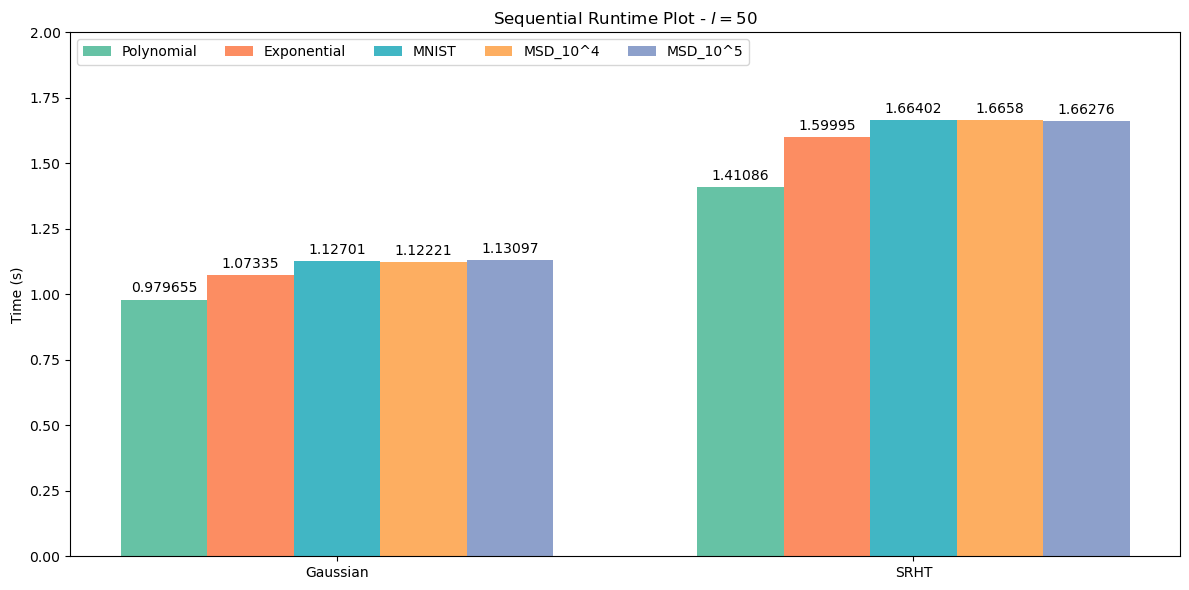

In [32]:
# l = 50

sketchings = ("Gaussian", "SRHT")

mean_runtimes = {
    "Polynomial" : (Poly_1_50_G_mean, Poly_1_50_S_mean),
    "Exponential" : (Exp_1_50_G_mean, Exp_1_50_S_mean),
    "MNIST": (MNIST_1_50_G_mean, MNIST_1_50_S_mean),
    "MSD_10^4": (MSD4_1_50_G_mean, MSD4_1_50_S_mean),
    "MSD_10^5": (MSD5_1_50_G_mean, MSD5_1_50_S_mean),
}

# Updated custom colors
colors = ['#66c2a5', '#fc8d62', '#41b6c4', '#fdae61', '#8da0cb']

# Plot the results
x = np.arange(len(sketchings))
width = 0.15
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6))

for (attribute, measurement), color in zip(mean_runtimes.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1 

ax.set_ylabel('Time (s)')
ax.set_title(r'Sequential Runtime Plot - $l=50$')
ax.set_xticks(x + 2*width, sketchings)
ax.legend(loc='upper left', ncols=len(mean_runtimes))
ax.set_ylim(0, 2)

plt.tight_layout()
plt.savefig("sequential_runtimes_50.png")

plt.show()

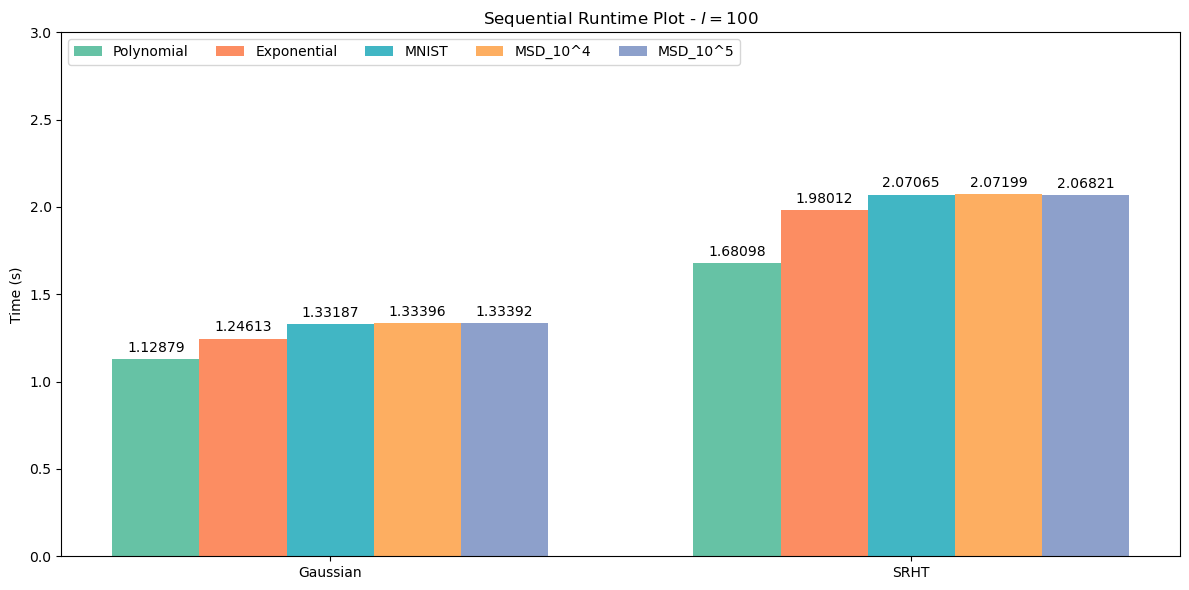

In [33]:
# l = 100

mean_runtimes = {
    "Polynomial" : (Poly_1_100_G_mean, Poly_1_100_S_mean),
    "Exponential" : (Exp_1_100_G_mean, Exp_1_100_S_mean),
    "MNIST": (MNIST_1_100_G_mean, MNIST_1_100_S_mean),
    "MSD_10^4": (MSD4_1_100_G_mean, MSD4_1_100_S_mean),
    "MSD_10^5": (MSD5_1_100_G_mean, MSD5_1_100_S_mean),
}

# Updated custom colors
colors = ['#66c2a5', '#fc8d62', '#41b6c4', '#fdae61', '#8da0cb']

# Plot the results
x = np.arange(len(sketchings))
width = 0.15
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6))

for (attribute, measurement), color in zip(mean_runtimes.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Time (s)')
ax.set_title(r'Sequential Runtime Plot - $l=100$')
ax.set_xticks(x + 2*width, sketchings)
ax.legend(loc='upper left', ncols=len(mean_runtimes))
ax.set_ylim(0, 3)

plt.tight_layout()
plt.savefig("sequential_runtimes_100.png")

plt.show()

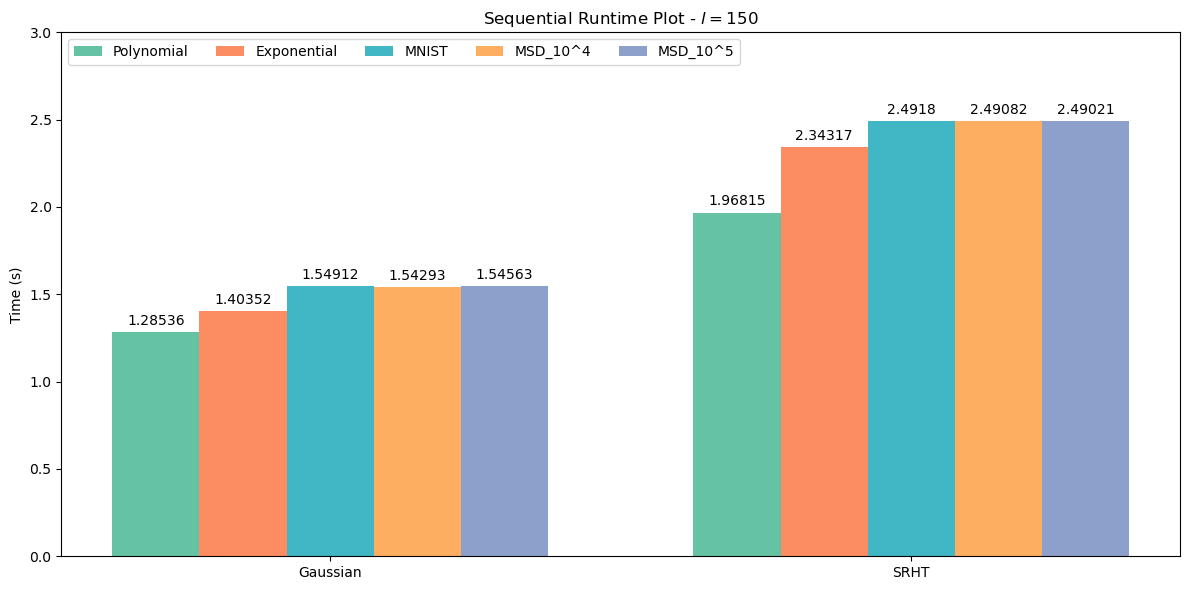

In [34]:
# l = 150

mean_runtimes = {
    "Polynomial" : (Poly_1_150_G_mean, Poly_1_150_S_mean),
    "Exponential" : (Exp_1_150_G_mean, Exp_1_150_S_mean),
    "MNIST": (MNIST_1_150_G_mean, MNIST_1_150_S_mean),
    "MSD_10^4": (MSD4_1_150_G_mean, MSD4_1_150_S_mean),
    "MSD_10^5": (MSD5_1_150_G_mean, MSD5_1_150_S_mean),
}

# Updated custom colors
colors = ['#66c2a5', '#fc8d62', '#41b6c4', '#fdae61', '#8da0cb']

# Plot the results

x = np.arange(len(sketchings))
width = 0.15
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6))

for (attribute, measurement), color in zip(mean_runtimes.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Time (s)')
ax.set_title(r'Sequential Runtime Plot - $l=150$')
ax.set_xticks(x + 2*width, sketchings)
ax.legend(loc='upper left', ncols=len(mean_runtimes))
ax.set_ylim(0, 3)

plt.tight_layout()
plt.savefig("sequential_runtimes_150.png")

plt.show()

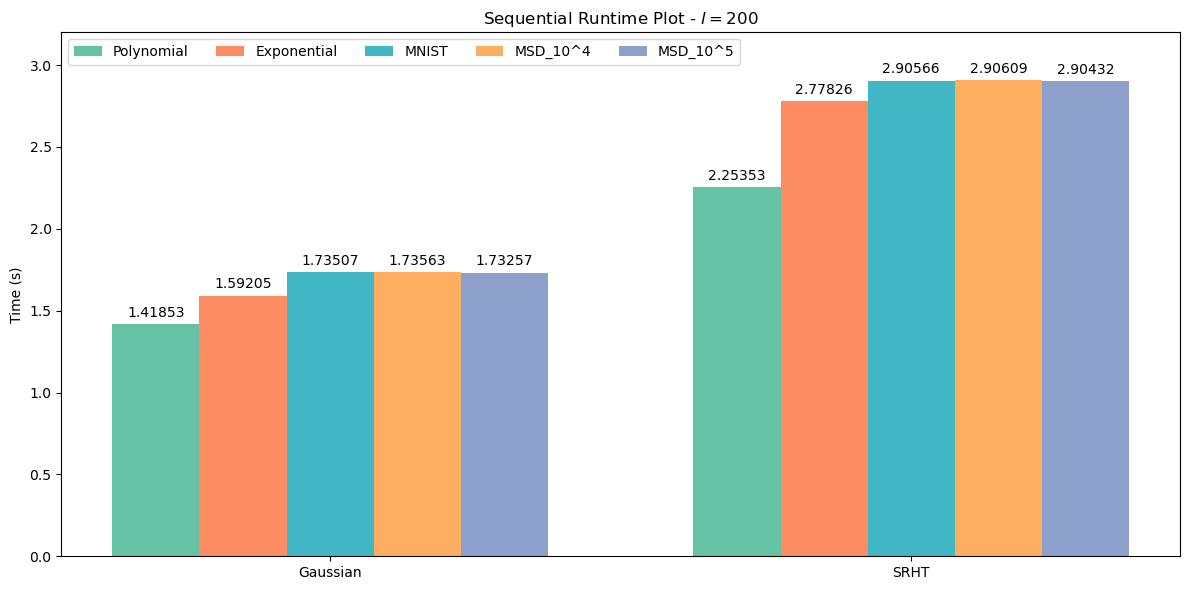

In [35]:
# l = 200

mean_runtimes = {
    "Polynomial" : (Poly_1_200_G_mean, Poly_1_200_S_mean),
    "Exponential" : (Exp_1_200_G_mean, Exp_1_200_S_mean),
    "MNIST": (MNIST_1_200_G_mean, MNIST_1_200_S_mean),
    "MSD_10^4": (MSD4_1_200_G_mean, MSD4_1_200_S_mean),
    "MSD_10^5": (MSD5_1_200_G_mean, MSD5_1_200_S_mean),
}

# Updated custom colors
colors = ['#66c2a5', '#fc8d62', '#41b6c4', '#fdae61', '#8da0cb']

# Plot the results
x = np.arange(len(sketchings))
width = 0.15
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6))

for (attribute, measurement), color in zip(mean_runtimes.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Time (s)')
ax.set_title(r'Sequential Runtime Plot - $l=200$')
ax.set_xticks(x + 2*width, sketchings)
ax.legend(loc='upper left', ncols=len(mean_runtimes))
ax.set_ylim(0, 3.2)

plt.tight_layout()
plt.savefig("sequential_runtimes_200.png")

plt.show()

## Parallel Runtimes

### Runtimes Analysis

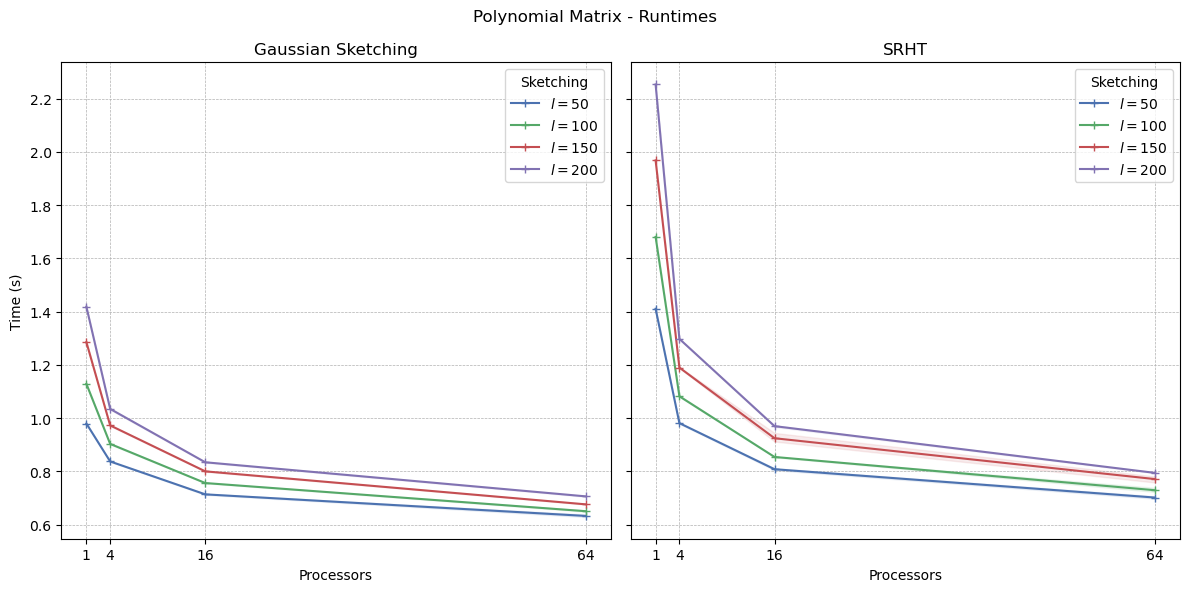

In [37]:
# Polynomial Decay Matrix

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian sketching
axes[0].plot([1, 4, 16, 64], [Poly_1_50_G_mean, Poly_4_50_G_mean, Poly_16_50_G_mean, Poly_64_50_G_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot([1, 4, 16, 64], [Poly_1_100_G_mean, Poly_4_100_G_mean, Poly_16_100_G_mean, Poly_64_100_G_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot([1, 4, 16, 64], [Poly_1_150_G_mean, Poly_4_150_G_mean, Poly_16_150_G_mean, Poly_64_150_G_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot([1, 4, 16, 64], [Poly_1_200_G_mean, Poly_4_200_G_mean, Poly_16_200_G_mean, Poly_64_200_G_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[0].fill_between([1, 4, 16, 64], 
                     [Poly_1_50_G_min, Poly_4_50_G_min, Poly_16_50_G_min, Poly_64_50_G_min], 
                     [Poly_1_50_G_max, Poly_4_50_G_max, Poly_16_50_G_max, Poly_64_50_G_max], 
                     color='#4c72b0', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Poly_1_100_G_min, Poly_4_100_G_min, Poly_16_100_G_min, Poly_64_100_G_min], 
                     [Poly_1_100_G_max, Poly_4_100_G_max, Poly_16_100_G_max, Poly_64_100_G_max], 
                     color='#55a868', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Poly_1_150_G_min, Poly_4_150_G_min, Poly_16_150_G_min, Poly_64_150_G_min], 
                     [Poly_1_150_G_max, Poly_4_150_G_max, Poly_16_150_G_max, Poly_64_150_G_max], 
                     color='#c44e52', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Poly_1_200_G_min, Poly_4_200_G_min, Poly_16_200_G_min, Poly_64_200_G_min], 
                     [Poly_1_200_G_max, Poly_4_200_G_max, Poly_16_200_G_max, Poly_64_200_G_max], 
                     color='#8172b2', alpha=0.1)
axes[0].set_title("Gaussian Sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks([1, 4, 16, 64])
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT sketching
axes[1].plot([1, 4, 16, 64], [Poly_1_50_S_mean, Poly_4_50_S_mean, Poly_16_50_S_mean, Poly_64_50_S_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot([1, 4, 16, 64], [Poly_1_100_S_mean, Poly_4_100_S_mean, Poly_16_100_S_mean, Poly_64_100_S_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot([1, 4, 16, 64], [Poly_1_150_S_mean, Poly_4_150_S_mean, Poly_16_150_S_mean, Poly_64_150_S_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot([1, 4, 16, 64], [Poly_1_200_S_mean, Poly_4_200_S_mean, Poly_16_200_S_mean, Poly_64_200_S_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[1].fill_between([1, 4, 16, 64], 
                     [Poly_1_50_S_min, Poly_4_50_S_min, Poly_16_50_S_min, Poly_64_50_S_min], 
                     [Poly_1_50_S_max, Poly_4_50_S_max, Poly_16_50_S_max, Poly_64_50_S_max], 
                     color='#4c72b0', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Poly_1_100_S_min, Poly_4_100_S_min, Poly_16_100_S_min, Poly_64_100_S_min], 
                     [Poly_1_100_S_max, Poly_4_100_S_max, Poly_16_100_S_max, Poly_64_100_S_max], 
                     color='#55a868', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Poly_1_150_S_min, Poly_4_150_S_min, Poly_16_150_S_min, Poly_64_150_S_min], 
                     [Poly_1_150_S_max, Poly_4_150_S_max, Poly_16_150_S_max, Poly_64_150_S_max], 
                     color='#c44e52', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Poly_1_200_S_min, Poly_4_200_S_min, Poly_16_200_S_min, Poly_64_200_S_min], 
                     [Poly_1_200_S_max, Poly_4_200_S_max, Poly_16_200_S_max, Poly_64_200_S_max], 
                     color='#8172b2', alpha=0.1)
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks([1, 4, 16, 64])
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"Polynomial Matrix - Runtimes")
plt.tight_layout()
plt.savefig("poly_matrix_runtimes.png")
plt.show()

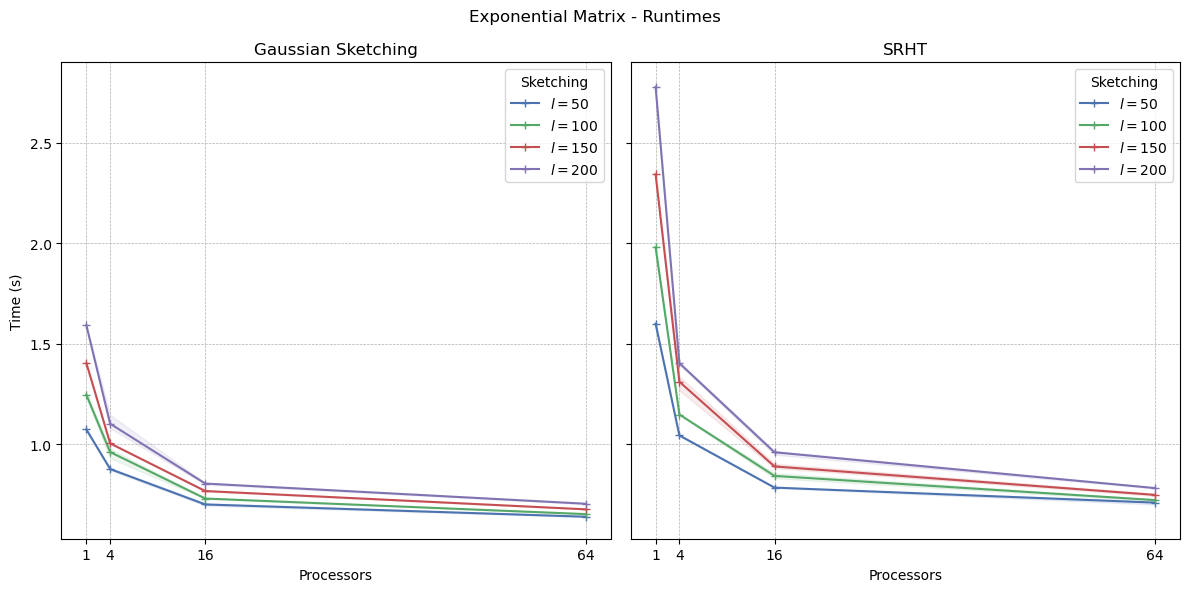

In [39]:
# Exponential Decay Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian sketching
axes[0].plot([1, 4, 16, 64], [Exp_1_50_G_mean, Exp_4_50_G_mean, Exp_16_50_G_mean, Exp_64_50_G_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot([1, 4, 16, 64], [Exp_1_100_G_mean, Exp_4_100_G_mean, Exp_16_100_G_mean, Exp_64_100_G_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot([1, 4, 16, 64], [Exp_1_150_G_mean, Exp_4_150_G_mean, Exp_16_150_G_mean, Exp_64_150_G_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot([1, 4, 16, 64], [Exp_1_200_G_mean, Exp_4_200_G_mean, Exp_16_200_G_mean, Exp_64_200_G_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_50_G_min, Exp_4_50_G_min, Exp_16_50_G_min, Exp_64_50_G_min], 
                     [Exp_1_50_G_max, Exp_4_50_G_max, Exp_16_50_G_max, Exp_64_50_G_max], 
                     color='#4c72b0', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_100_G_min, Exp_4_100_G_min, Exp_16_100_G_min, Exp_64_100_G_min], 
                     [Exp_1_100_G_max, Exp_4_100_G_max, Exp_16_100_G_max, Exp_64_100_G_max], 
                     color='#55a868', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_150_G_min, Exp_4_150_G_min, Exp_16_150_G_min, Exp_64_150_G_min], 
                     [Exp_1_150_G_max, Exp_4_150_G_max, Exp_16_150_G_max, Exp_64_150_G_max], 
                     color='#c44e52', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_200_G_min, Exp_4_200_G_min, Exp_16_200_G_min, Exp_64_200_G_min], 
                     [Exp_1_200_G_max, Exp_4_200_G_max, Exp_16_200_G_max, Exp_64_200_G_max], 
                     color='#8172b2', alpha=0.1)
axes[0].set_title("Gaussian Sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks([1, 4, 16, 64])
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT sketching
axes[1].plot([1, 4, 16, 64], [Exp_1_50_S_mean, Exp_4_50_S_mean, Exp_16_50_S_mean, Exp_64_50_S_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot([1, 4, 16, 64], [Exp_1_100_S_mean, Exp_4_100_S_mean, Exp_16_100_S_mean, Exp_64_100_S_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot([1, 4, 16, 64], [Exp_1_150_S_mean, Exp_4_150_S_mean, Exp_16_150_S_mean, Exp_64_150_S_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot([1, 4, 16, 64], [Exp_1_200_S_mean, Exp_4_200_S_mean, Exp_16_200_S_mean, Exp_64_200_S_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_50_S_min, Exp_4_50_S_min, Exp_16_50_S_min, Exp_64_50_S_min], 
                     [Exp_1_50_S_max, Exp_4_50_S_max, Exp_16_50_S_max, Exp_64_50_S_max], 
                     color='#4c72b0', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_100_S_min, Exp_4_100_S_min, Exp_16_100_S_min, Exp_64_100_S_min], 
                     [Exp_1_100_S_max, Exp_4_100_S_max, Exp_16_100_S_max, Exp_64_100_S_max], 
                     color='#55a868', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_150_S_min, Exp_4_150_S_min, Exp_16_150_S_min, Exp_64_150_S_min], 
                     [Exp_1_150_S_max, Exp_4_150_S_max, Exp_16_150_S_max, Exp_64_150_S_max], 
                     color='#c44e52', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_200_S_min, Exp_4_200_S_min, Exp_16_200_S_min, Exp_64_200_S_min], 
                     [Exp_1_200_S_max, Exp_4_200_S_max, Exp_16_200_S_max, Exp_64_200_S_max], 
                     color='#8172b2', alpha=0.1)
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks([1, 4, 16, 64])
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"Exponential Matrix - Runtimes")
plt.tight_layout()
plt.savefig("exp_matrix_runtimes.png")
plt.show()

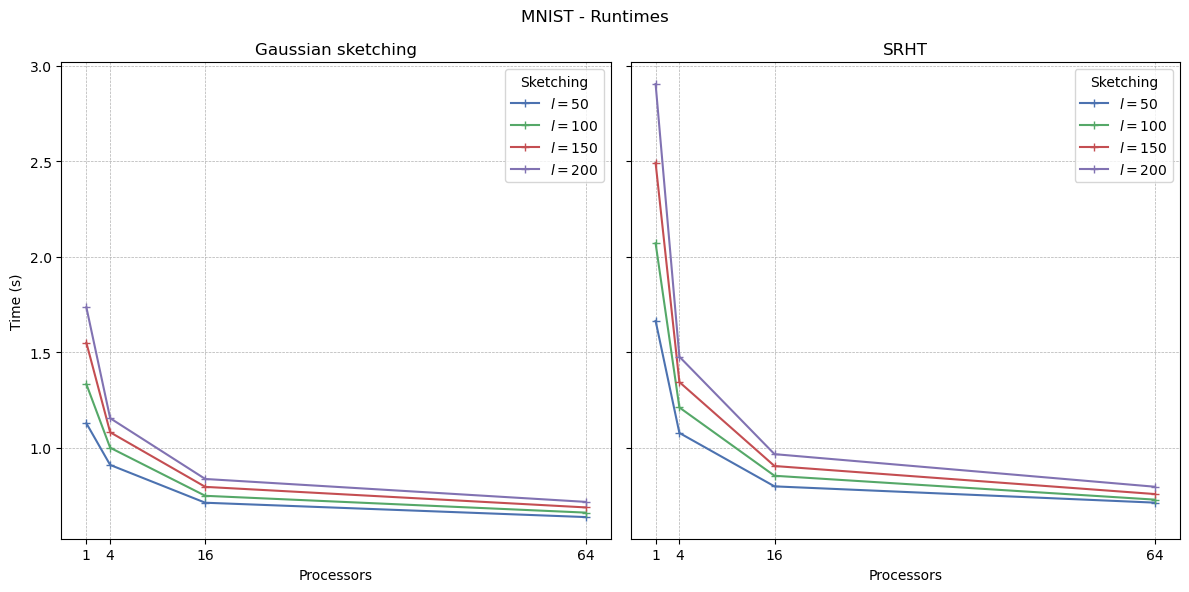

In [41]:
# MNIST
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian data
axes[0].plot(processors, MNIST_gaussian_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot(processors, MNIST_gaussian_100, label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot(processors, MNIST_gaussian_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot(processors, MNIST_gaussian_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[0].set_title("Gaussian sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(processors)
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT data
axes[1].plot(processors, MNIST_SRHT_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot(processors, MNIST_SRHT_100, label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot(processors, MNIST_SRHT_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot(processors, MNIST_SRHT_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks(processors)
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle("MNIST - Runtimes")

# Show the plot
plt.tight_layout()
plt.show()

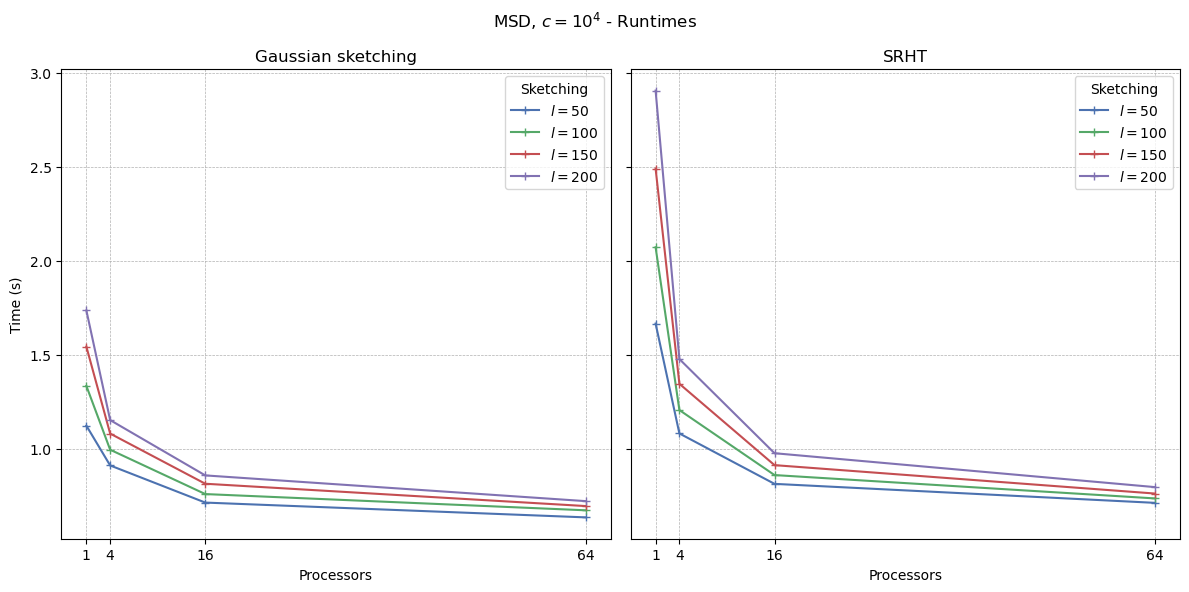

In [44]:
# MSD_104
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian data
axes[0].plot(processors, MSD_104_gaussian_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot(processors, MSD_104_gaussian_100, label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot(processors, MSD_104_gaussian_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot(processors, MSD_104_gaussian_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[0].set_title("Gaussian sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(processors)
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT data
axes[1].plot(processors, MSD_104_SRHT_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot(processors, MSD_104_SRHT_100, label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot(processors, MSD_104_SRHT_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot(processors, MSD_104_SRHT_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks(processors)
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"MSD, $c=10^4$ - Runtimes")

# Show the plot
plt.tight_layout()
plt.show()

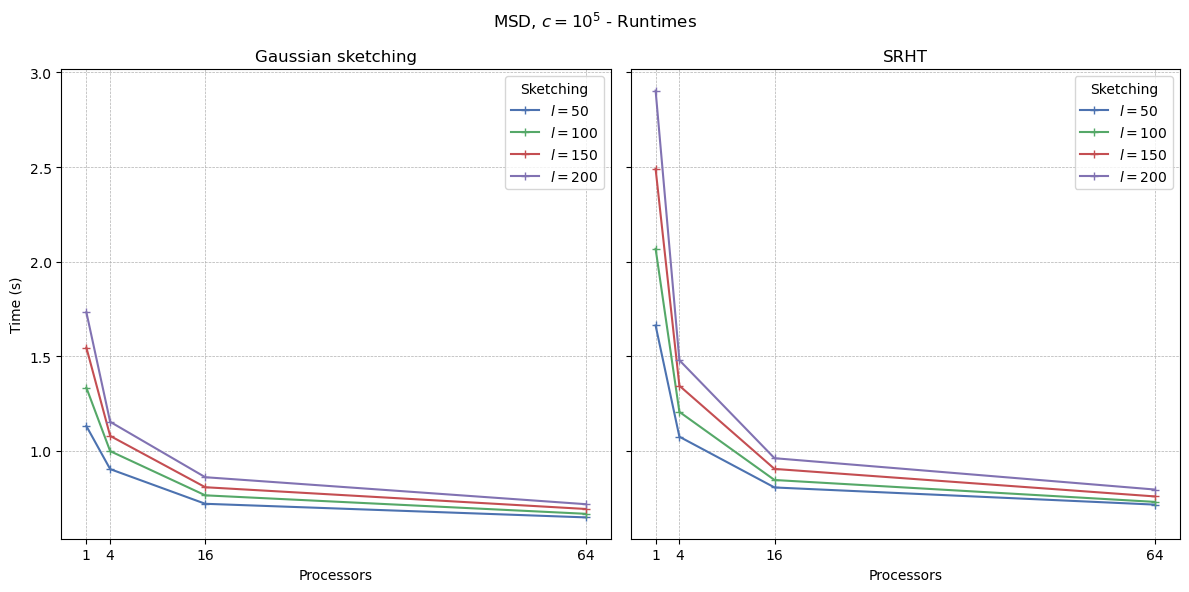

In [46]:
# MSD_105
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian data
axes[0].plot(processors, MSD_105_gaussian_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot(processors, MSD_105_gaussian_100, label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot(processors, MSD_105_gaussian_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot(processors, MSD_105_gaussian_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[0].set_title("Gaussian sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(processors)
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT data
axes[1].plot(processors, MSD_105_SRHT_50, label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot(processors, MSD_105_SRHT_100, label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot(processors, MSD_105_SRHT_150, label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot(processors, MSD_105_SRHT_200, label=r"$l=200$", marker='+', color='#8172b2')
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks(processors)
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"MSD, $c=10^5$ - Runtimes")

# Show the plot
plt.tight_layout()
plt.show()

### Scatter vs No Scatter

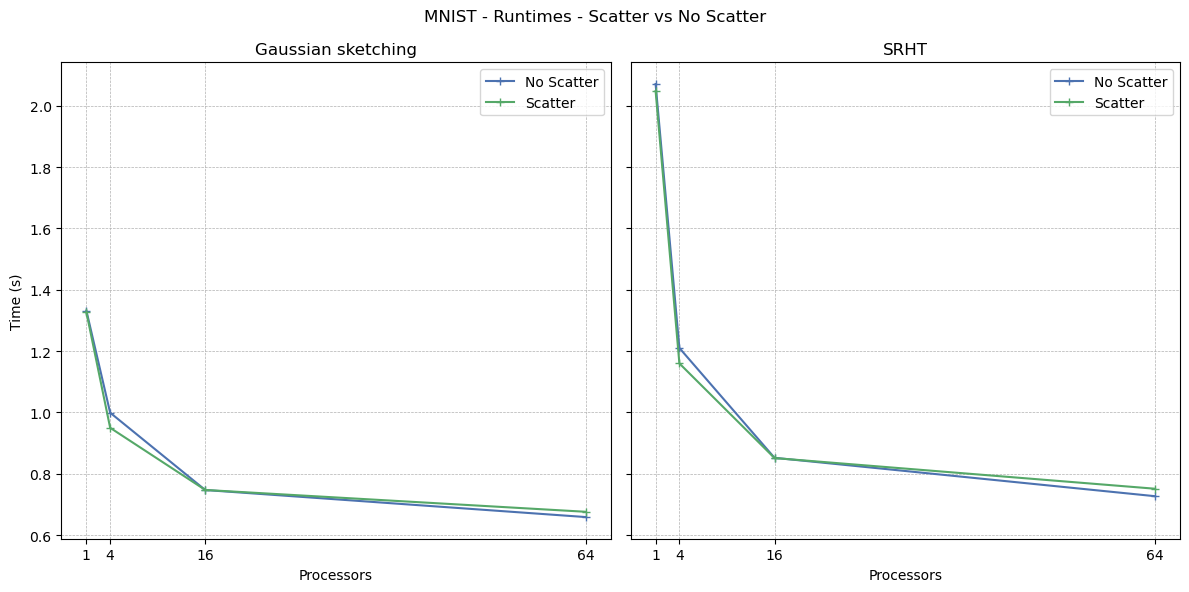

In [51]:
# MNIST
MNIST_gaussian_1_100_noscatter = np.array([1.337747043, 1.328301349, 1.329556992])
MNIST_gaussian_4_100_noscatter = np.array([0.998649279, 0.998992159, 0.999152965])
MNIST_gaussian_16_100_noscatter = np.array([0.748288888, 0.747145798, 0.745033307])
MNIST_gaussian_64_100_noscatter = np.array([0.65866044, 0.655317209, 0.662087986])

MNIST_SRHT_1_100_noscatter = np.array([2.071366968, 2.069707611, 2.070866843])
MNIST_SRHT_4_100_noscatter = np.array([1.214083043, 1.209597514, 1.206105641])
MNIST_SRHT_16_100_noscatter = np.array([0.857326289, 0.850078592, 0.848236379])
MNIST_SRHT_64_100_noscatter = np.array([0.72825977, 0.727498035, 0.724427005])

MNIST_gaussian_100_noscatter = np.array([np.mean(MNIST_gaussian_1_100_noscatter), np.mean(MNIST_gaussian_4_100_noscatter), np.mean(MNIST_gaussian_16_100_noscatter), np.mean(MNIST_gaussian_64_100_noscatter)])
MNIST_SRHT_100_noscatter = np.array([np.mean(MNIST_SRHT_1_100_noscatter), np.mean(MNIST_SRHT_4_100_noscatter), np.mean(MNIST_SRHT_16_100_noscatter), np.mean(MNIST_SRHT_64_100_noscatter)])

MNIST_gaussian_1_100_scatter = np.array([1.340336838, 1.331322616, 1.308791214])
MNIST_gaussian_4_100_scatter = np.array([0.949806951, 0.950018713, 0.949337153])
MNIST_gaussian_16_100_scatter = np.array([0.740254645, 0.759131537, 0.741840527])
MNIST_gaussian_64_100_scatter = np.array([0.677335547, 0.676505387, 0.673862347])

MNIST_SRHT_1_100_scatter = np.array([2.02571677, 2.060662205, 2.057266548])
MNIST_SRHT_4_100_scatter = np.array([1.15693556, 1.164502259, 1.157346419])
MNIST_SRHT_16_100_scatter = np.array([0.853041906, 0.858708436, 0.84150463])
MNIST_SRHT_64_100_scatter = np.array([0.755189162, 0.754875064, 0.743196539])

MNIST_gaussian_100_scatter = np.array([np.mean(MNIST_gaussian_1_100_scatter), np.mean(MNIST_gaussian_4_100_scatter), np.mean(MNIST_gaussian_16_100_scatter), np.mean(MNIST_gaussian_64_100_scatter)])
MNIST_SRHT_100_scatter = np.array([np.mean(MNIST_SRHT_1_100_scatter), np.mean(MNIST_SRHT_4_100_scatter), np.mean(MNIST_SRHT_16_100_scatter), np.mean(MNIST_SRHT_64_100_scatter)])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# First subplot: Gaussian data
axes[0].plot(processors, MNIST_gaussian_100_noscatter, label=r"No Scatter", marker='+', color='#4c72b0')
axes[0].plot(processors, MNIST_gaussian_100_scatter, label=r"Scatter", marker='+', color='#55a868')
axes[0].set_title("Gaussian sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(processors)
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT data
axes[1].plot(processors, MNIST_SRHT_100_noscatter, label=r"No Scatter", marker='+', color='#4c72b0')
axes[1].plot(processors, MNIST_SRHT_100_scatter, label=r"Scatter", marker='+', color='#55a868')
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks(processors)
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"MNIST - Runtimes - Scatter vs No Scatter")

# Show the plot
plt.tight_layout()
plt.show()

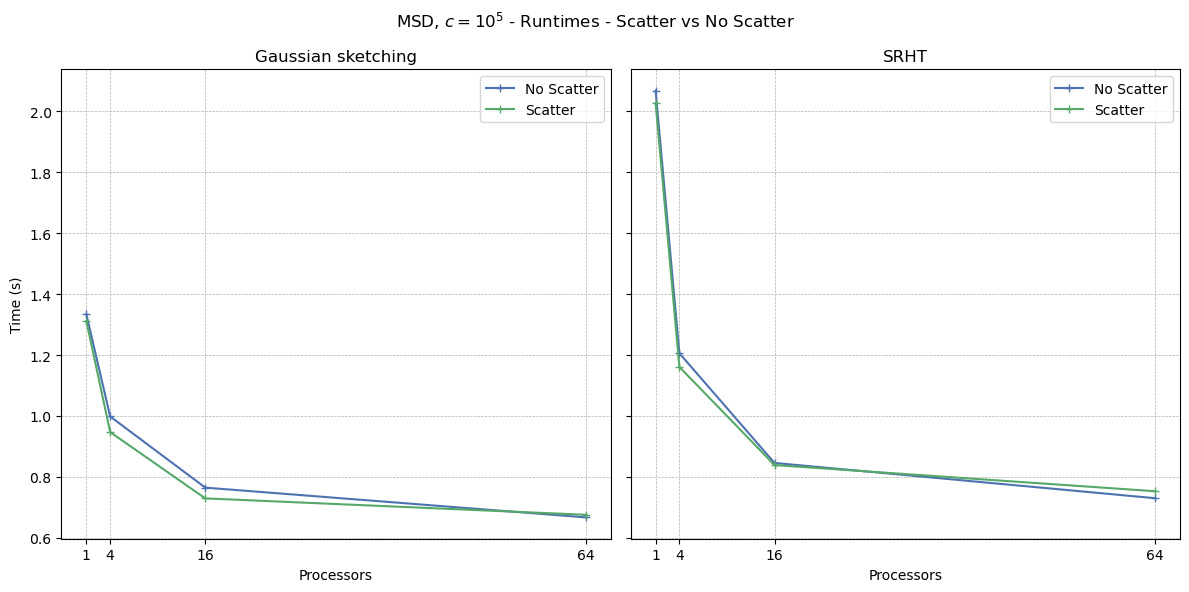

In [48]:
# MSD_105
MSD_105_gaussian_1_100_noscatter = np.array([1.331227337, 1.32987377, 1.34064854])
MSD_105_gaussian_4_100_noscatter = np.array([0.994844561, 0.999571451, 1.0010241])
MSD_105_gaussian_16_100_noscatter = np.array([0.761020572, 0.772358293, 0.761108566])
MSD_105_gaussian_64_100_noscatter = np.array([0.66147491, 0.670937688, 0.669087945])

MSD_105_SRHT_1_100_noscatter = np.array([2.067379236, 2.068475477, 2.068773595])
MSD_105_SRHT_4_100_noscatter = np.array([1.203849509, 1.206378688, 1.207594367])
MSD_105_SRHT_16_100_noscatter = np.array([0.847259453, 0.84466268, 0.845701314])
MSD_105_SRHT_64_100_noscatter = np.array([0.740217280, 0.725386635, 0.724819493])

MSD_105_gaussian_100_noscatter = np.array([np.mean(MSD_105_gaussian_1_100_noscatter), np.mean(MSD_105_gaussian_4_100_noscatter), np.mean(MSD_105_gaussian_16_100_noscatter), np.mean(MSD_105_gaussian_64_100_noscatter)])
MSD_105_SRHT_100_noscatter = np.array([np.mean(MSD_105_SRHT_1_100_noscatter), np.mean(MSD_105_SRHT_4_100_noscatter), np.mean(MSD_105_SRHT_16_100_noscatter), np.mean(MSD_105_SRHT_64_100_noscatter)])

MSD_105_gaussian_1_100_scatter = np.array([1.318399769, 1.310636369, 1.305945357])
MSD_105_gaussian_4_100_scatter = np.array([0.945376098, 0.949229567, 0.946882906])
MSD_105_gaussian_16_100_scatter = np.array([0.735444865, 0.728095987, 0.725058827])
MSD_105_gaussian_64_100_scatter = np.array([0.674066604, 0.677266367, 0.67554265])

MSD_105_SRHT_1_100_scatter = np.array([2.026535813, 2.025767901, 2.02897814])
MSD_105_SRHT_4_100_scatter = np.array([1.158230492, 1.163506859, 1.1614482])
MSD_105_SRHT_16_100_scatter = np.array([0.838972017, 0.83588035, 0.841897027])
MSD_105_SRHT_64_100_scatter = np.array([0.749754096, 0.758900581, 0.750396435])

MSD_105_gaussian_100_scatter = np.array([np.mean(MSD_105_gaussian_1_100_scatter), np.mean(MSD_105_gaussian_4_100_scatter), np.mean(MSD_105_gaussian_16_100_scatter), np.mean(MSD_105_gaussian_64_100_scatter)])
MSD_105_SRHT_100_scatter = np.array([np.mean(MSD_105_SRHT_1_100_scatter), np.mean(MSD_105_SRHT_4_100_scatter), np.mean(MSD_105_SRHT_16_100_scatter), np.mean(MSD_105_SRHT_64_100_scatter)])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# First subplot: Gaussian data
axes[0].plot(processors, MSD_105_gaussian_100_noscatter, label=r"No Scatter", marker='+', color='#4c72b0')
axes[0].plot(processors, MSD_105_gaussian_100_scatter, label=r"Scatter", marker='+', color='#55a868')
axes[0].set_title("Gaussian sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(processors)
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT data
axes[1].plot(processors, MSD_105_SRHT_100_noscatter, label=r"No Scatter", marker='+', color='#4c72b0')
axes[1].plot(processors, MSD_105_SRHT_100_scatter, label=r"Scatter", marker='+', color='#55a868')
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks(processors)
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"MSD, $c=10^5$ - Runtimes - Scatter vs No Scatter")

# Show the plot

plt.tight_layout()
plt.show()

### Float Underflow

In [55]:
Exp_1_50_G = [2.097232981, 1.950085466, 1.954903672]
Exp_1_100_G = [2.161884696, 2.146220301, 2.146620458]
Exp_1_150_G = [2.400904012, 2.386321711, 2.396913713]
Exp_1_200_G = [2.643701408, 2.654855527, 2.638019235]

Exp_4_50_G = [2.374551113, 2.389672288, 2.617448576]
Exp_4_100_G = [2.563201752, 2.268587662, 2.432585481]
Exp_4_150_G = [2.820021177, 2.865827951, 2.783600218]
Exp_4_200_G = [3.429951235, 3.24413133, 3.008283955]

Exp_16_50_G = [2.189079917, 2.177940289, 2.18237556]
Exp_16_100_G = [2.307065308, 2.313325743, 2.30711732]
Exp_16_150_G = [2.485574175, 2.481599565, 2.476552121]
Exp_16_200_G = [2.669965126, 2.67395653, 2.679445989]

Exp_64_50_G = [2.100645275, 2.099595832, 2.10505944]
Exp_64_100_G = [2.191440365, 2.191802424, 2.19644841]
Exp_64_150_G = [2.33244405, 2.337343432, 2.338168428]
Exp_64_200_G = [2.494926742, 2.502133186, 2.499192755]

Exp_1_50_G_mean, Exp_1_50_G_min, Exp_1_50_G_max = np.mean(Exp_1_50_G), min(Exp_1_50_G), max(Exp_1_50_G)
Exp_1_100_G_mean, Exp_1_100_G_min, Exp_1_100_G_max = np.mean(Exp_1_100_G), min(Exp_1_100_G), max(Exp_1_100_G)
Exp_1_150_G_mean, Exp_1_150_G_min, Exp_1_150_G_max = np.mean(Exp_1_150_G), min(Exp_1_150_G), max(Exp_1_150_G)
Exp_1_200_G_mean, Exp_1_200_G_min, Exp_1_200_G_max = np.mean(Exp_1_200_G), min(Exp_1_200_G), max(Exp_1_200_G)

Exp_4_50_G_mean, Exp_4_50_G_min, Exp_4_50_G_max = np.mean(Exp_4_50_G), min(Exp_4_50_G), max(Exp_4_50_G)
Exp_4_100_G_mean, Exp_4_100_G_min, Exp_4_100_G_max = np.mean(Exp_4_100_G), min(Exp_4_100_G), max(Exp_4_100_G)
Exp_4_150_G_mean, Exp_4_150_G_min, Exp_4_150_G_max = np.mean(Exp_4_150_G), min(Exp_4_150_G), max(Exp_4_150_G)
Exp_4_200_G_mean, Exp_4_200_G_min, Exp_4_200_G_max = np.mean(Exp_4_200_G), min(Exp_4_200_G), max(Exp_4_200_G)

Exp_16_50_G_mean, Exp_16_50_G_min, Exp_16_50_G_max = np.mean(Exp_16_50_G), min(Exp_16_50_G), max(Exp_16_50_G)
Exp_16_100_G_mean, Exp_16_100_G_min, Exp_16_100_G_max = np.mean(Exp_16_100_G), min(Exp_16_100_G), max(Exp_16_100_G)
Exp_16_150_G_mean, Exp_16_150_G_min, Exp_16_150_G_max = np.mean(Exp_16_150_G), min(Exp_16_150_G), max(Exp_16_150_G)
Exp_16_200_G_mean, Exp_16_200_G_min, Exp_16_200_G_max = np.mean(Exp_16_200_G), min(Exp_16_200_G), max(Exp_16_200_G)

Exp_64_50_G_mean, Exp_64_50_G_min, Exp_64_50_G_max = np.mean(Exp_64_50_G), min(Exp_64_50_G), max(Exp_64_50_G)
Exp_64_100_G_mean, Exp_64_100_G_min, Exp_64_100_G_max = np.mean(Exp_64_100_G), min(Exp_64_100_G), max(Exp_64_100_G)
Exp_64_150_G_mean, Exp_64_150_G_min, Exp_64_150_G_max = np.mean(Exp_64_150_G), min(Exp_64_150_G), max(Exp_64_150_G)
Exp_64_200_G_mean, Exp_64_200_G_min, Exp_64_200_G_max = np.mean(Exp_64_200_G), min(Exp_64_200_G), max(Exp_64_200_G)

In [56]:
Exp_1_50_S = [2.346779291, 2.320621484, 2.302257309]
Exp_1_100_S = [2.85001338, 2.692967193, 2.638929731]
Exp_1_150_S = [2.968580532, 2.956281645, 3.000839781]
Exp_1_200_S = [3.475048792, 3.475104758, 3.488678891]

Exp_4_50_S = [2.753307225, 2.639393465, 2.749031477]
Exp_4_100_S = [2.978090394, 3.005389315, 3.010173816]
Exp_4_150_S = [3.078086546, 2.772115624, 3.195992263]
Exp_4_200_S = [3.244131926, 3.009320459, 3.133769513]

Exp_16_50_S = [2.359143258, 2.363569778, 2.348933228]
Exp_16_100_S = [2.397766826, 2.393672165, 2.390061719]
Exp_16_150_S = [2.538315045, 2.515752197, 2.537196161]
Exp_16_200_S = [2.730997315, 2.737470718, 2.721897594]

Exp_64_50_S = [2.240723422, 2.243764733, 2.249465551]
Exp_64_100_S = [2.249835708, 2.244572238, 2.249869845]
Exp_64_150_S = [2.338895461, 2.343065313, 2.33888505]
Exp_64_200_S = [2.511355308, 2.512947962, 2.503216754]

Exp_1_50_S_mean, Exp_1_50_S_min, Exp_1_50_S_max = np.mean(Exp_1_50_S), min(Exp_1_50_S), max(Exp_1_50_S)
Exp_1_100_S_mean, Exp_1_100_S_min, Exp_1_100_S_max = np.mean(Exp_1_100_S), min(Exp_1_100_S), max(Exp_1_100_S)
Exp_1_150_S_mean, Exp_1_150_S_min, Exp_1_150_S_max = np.mean(Exp_1_150_S), min(Exp_1_150_S), max(Exp_1_150_S)
Exp_1_200_S_mean, Exp_1_200_S_min, Exp_1_200_S_max = np.mean(Exp_1_200_S), min(Exp_1_200_S), max(Exp_1_200_S)

Exp_4_50_S_mean, Exp_4_50_S_min, Exp_4_50_S_max = np.mean(Exp_4_50_S), min(Exp_4_50_S), max(Exp_4_50_S)
Exp_4_100_S_mean, Exp_4_100_S_min, Exp_4_100_S_max = np.mean(Exp_4_100_S), min(Exp_4_100_S), max(Exp_4_100_S)
Exp_4_150_S_mean, Exp_4_150_S_min, Exp_4_150_S_max = np.mean(Exp_4_150_S), min(Exp_4_150_S), max(Exp_4_150_S)
Exp_4_200_S_mean, Exp_4_200_S_min, Exp_4_200_S_max = np.mean(Exp_4_200_S), min(Exp_4_200_S), max(Exp_4_200_S)

Exp_16_50_S_mean, Exp_16_50_S_min, Exp_16_50_S_max = np.mean(Exp_16_50_S), min(Exp_16_50_S), max(Exp_16_50_S)
Exp_16_100_S_mean, Exp_16_100_S_min, Exp_16_100_S_max = np.mean(Exp_16_100_S), min(Exp_16_100_S), max(Exp_16_100_S)
Exp_16_150_S_mean, Exp_16_150_S_min, Exp_16_150_S_max = np.mean(Exp_16_150_S), min(Exp_16_150_S), max(Exp_16_150_S)
Exp_16_200_S_mean, Exp_16_200_S_min, Exp_16_200_S_max = np.mean(Exp_16_200_S), min(Exp_16_200_S), max(Exp_16_200_S)

Exp_64_50_S_mean, Exp_64_50_S_min, Exp_64_50_S_max = np.mean(Exp_64_50_S), min(Exp_64_50_S), max(Exp_64_50_S)
Exp_64_100_S_mean, Exp_64_100_S_min, Exp_64_100_S_max = np.mean(Exp_64_100_S), min(Exp_64_100_S), max(Exp_64_100_S)
Exp_64_150_S_mean, Exp_64_150_S_min, Exp_64_150_S_max = np.mean(Exp_64_150_S), min(Exp_64_150_S), max(Exp_64_150_S)
Exp_64_200_S_mean, Exp_64_200_S_min, Exp_64_200_S_max = np.mean(Exp_64_200_S), min(Exp_64_200_S), max(Exp_64_200_S)

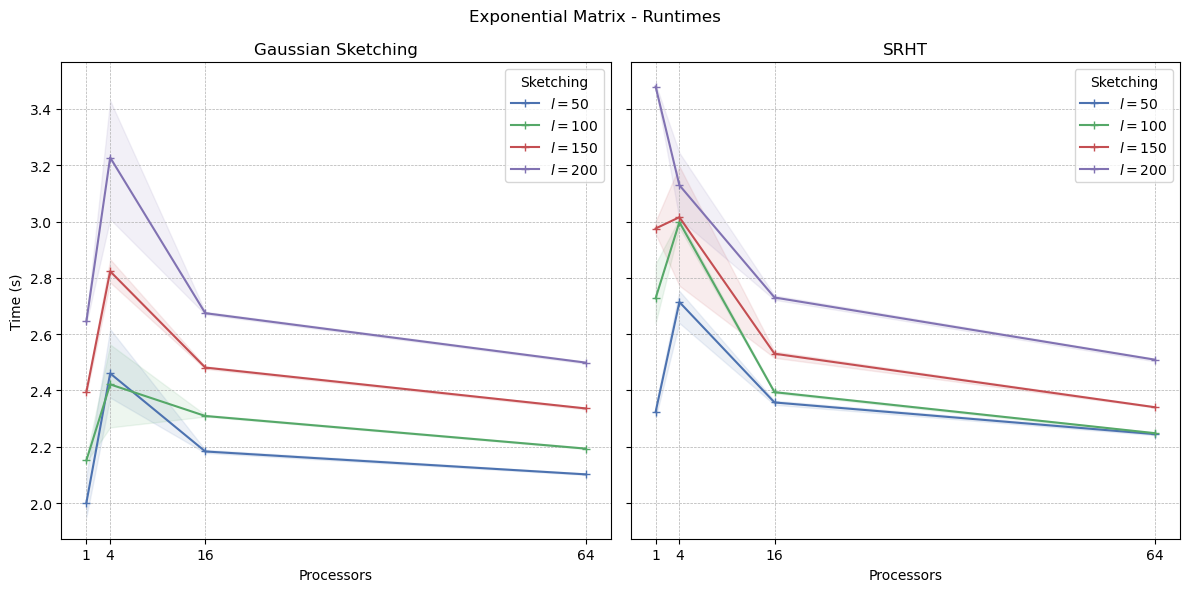

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot: Gaussian sketching
axes[0].plot([1, 4, 16, 64], [Exp_1_50_G_mean, Exp_4_50_G_mean, Exp_16_50_G_mean, Exp_64_50_G_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[0].plot([1, 4, 16, 64], [Exp_1_100_G_mean, Exp_4_100_G_mean, Exp_16_100_G_mean, Exp_64_100_G_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[0].plot([1, 4, 16, 64], [Exp_1_150_G_mean, Exp_4_150_G_mean, Exp_16_150_G_mean, Exp_64_150_G_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[0].plot([1, 4, 16, 64], [Exp_1_200_G_mean, Exp_4_200_G_mean, Exp_16_200_G_mean, Exp_64_200_G_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_50_G_min, Exp_4_50_G_min, Exp_16_50_G_min, Exp_64_50_G_min], 
                     [Exp_1_50_G_max, Exp_4_50_G_max, Exp_16_50_G_max, Exp_64_50_G_max], 
                     color='#4c72b0', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_100_G_min, Exp_4_100_G_min, Exp_16_100_G_min, Exp_64_100_G_min], 
                     [Exp_1_100_G_max, Exp_4_100_G_max, Exp_16_100_G_max, Exp_64_100_G_max], 
                     color='#55a868', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_150_G_min, Exp_4_150_G_min, Exp_16_150_G_min, Exp_64_150_G_min], 
                     [Exp_1_150_G_max, Exp_4_150_G_max, Exp_16_150_G_max, Exp_64_150_G_max], 
                     color='#c44e52', alpha=0.1)
axes[0].fill_between([1, 4, 16, 64], 
                     [Exp_1_200_G_min, Exp_4_200_G_min, Exp_16_200_G_min, Exp_64_200_G_min], 
                     [Exp_1_200_G_max, Exp_4_200_G_max, Exp_16_200_G_max, Exp_64_200_G_max], 
                     color='#8172b2', alpha=0.1)
axes[0].set_title("Gaussian Sketching")
axes[0].set_xlabel("Processors")
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks([1, 4, 16, 64])
axes[0].legend(title="Sketching")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot: SRHT sketching
axes[1].plot([1, 4, 16, 64], [Exp_1_50_S_mean, Exp_4_50_S_mean, Exp_16_50_S_mean, Exp_64_50_S_mean], 
             label=r"$l=50$", marker='+', color='#4c72b0')
axes[1].plot([1, 4, 16, 64], [Exp_1_100_S_mean, Exp_4_100_S_mean, Exp_16_100_S_mean, Exp_64_100_S_mean], 
             label=r"$l=100$", marker='+', color='#55a868')
axes[1].plot([1, 4, 16, 64], [Exp_1_150_S_mean, Exp_4_150_S_mean, Exp_16_150_S_mean, Exp_64_150_S_mean], 
             label=r"$l=150$", marker='+', color='#c44e52')
axes[1].plot([1, 4, 16, 64], [Exp_1_200_S_mean, Exp_4_200_S_mean, Exp_16_200_S_mean, Exp_64_200_S_mean], 
             label=r"$l=200$", marker='+', color='#8172b2')
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_50_S_min, Exp_4_50_S_min, Exp_16_50_S_min, Exp_64_50_S_min], 
                     [Exp_1_50_S_max, Exp_4_50_S_max, Exp_16_50_S_max, Exp_64_50_S_max], 
                     color='#4c72b0', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_100_S_min, Exp_4_100_S_min, Exp_16_100_S_min, Exp_64_100_S_min], 
                     [Exp_1_100_S_max, Exp_4_100_S_max, Exp_16_100_S_max, Exp_64_100_S_max], 
                     color='#55a868', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_150_S_min, Exp_4_150_S_min, Exp_16_150_S_min, Exp_64_150_S_min], 
                     [Exp_1_150_S_max, Exp_4_150_S_max, Exp_16_150_S_max, Exp_64_150_S_max], 
                     color='#c44e52', alpha=0.1)
axes[1].fill_between([1, 4, 16, 64], 
                     [Exp_1_200_S_min, Exp_4_200_S_min, Exp_16_200_S_min, Exp_64_200_S_min], 
                     [Exp_1_200_S_max, Exp_4_200_S_max, Exp_16_200_S_max, Exp_64_200_S_max], 
                     color='#8172b2', alpha=0.1)
axes[1].set_title("SRHT")
axes[1].set_xlabel("Processors")
axes[1].set_xticks([1, 4, 16, 64])
axes[1].legend(title="Sketching")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle(r"Exponential Matrix - Runtimes")
plt.tight_layout()
plt.savefig("exp_matrix_error_runtimes.png")
plt.show()